ĐỀ TÀI: CHIẾN LƯỢC TỐI ƯU HÓA TRẢI NGHIỆM HÀNH KHÁCH HÀNG KHÔNG DỰA TRÊN MÔ HÌNH DỰ BÁO HỌC MÁY
1. Bối cảnh và Lý do chọn đề tài:
```
● Trong bối cảnh ngành hàng không cạnh tranh gay gắt, sự hài lòng của khách hàng là yếu tố then chốt để duy trì lợi thế thương mại. 
● Việc nhận diện sớm những hành khách không hài lòng và hiểu rõ các "nút thắt" dịch vụ giúp doanh nghiệp giảm tỷ lệ rời bỏ và tối ưu hóa ngân sách đầu tư vào các điểm chạm (touchpoints) quan trọng.
``` 
2. Mục tiêu đề tài:
```
● Mục tiêu kỹ thuật: Xây dựng mô hình phân loại nhị phân (Classification) tối ưu bằng cách so sánh các thuật toán (Logistic Regression, Decision Tree, Random Forest) để dự báo chính xác trạng thái hài lòng. 
● Mục tiêu kinh doanh: Khám phá "insight" để trả lời câu hỏi: Dịch vụ nào là chìa khóa để biến một khách hàng từ không hài lòng thành hài lòng? 

------------------------------------------------------------------------------------------------------------------------------------------------------------

I. Đọc dữ liệu và load dữ liệu gốc:

In [5]:
import pandas as pd
import numpy as np
# Load dữ liệu từ nguồn Airline Passenger Satisfaction (TJ Kyner)
df_train_full = pd.read_csv('D:/DATA1/Study/DA/APM02/FinalProject_HoaPhuoc_APM02/Dataset/train.csv')
df_test_full = pd.read_csv('D:/DATA1/Study/DA/APM02/FinalProject_HoaPhuoc_APM02/Dataset/test.csv')
print("Train shape:", df_train_full.shape)
print("Test shape:", df_test_full.shape)

Train shape: (103904, 25)
Test shape: (25976, 25)


In [6]:
#Copy dữ liệu gốc để tránh thay đổi dữ liệu ban đầu
df_train = df_train_full.copy()
test_set = df_test_full.copy()

------------------------------------------------------------------------------------------------------------------------------------------------------------

II. Lấy mẫu dữ liệu:

Mục đích của việc này dùng để rút ngắn thời gian xây dựng mô hình, với toàn bộ dữ liệu tập train.csv là 103904 dòng, rất tốn thời gian cho việc xây dựng mô hình máy học nên với đề tài này, nhóm sẽ lấy mẫu dữ liệu là 15.000 dòng với phương pháp Stratified Sampling. Phương pháp này giúp duy trì tỷ lệ giữa nhóm khách hàng 'Hài lòng' và 'Trung lập/Không hài lòng' tương đương với tập dữ liệu gốc, từ đó giúp mô hình học máy đạt được sự khách quan tối đa.


In [7]:
# Trích xuất 15,000 dòng bằng Stratified Sampling 
# Giúp duy trì tỷ lệ khách 'Hài lòng' và 'Không hài lòng'
from sklearn.model_selection import train_test_split
train_sample, _ = train_test_split(
    df_train,
    train_size=15000,
    stratify=df_train['satisfaction'],
    random_state=42
)
print("Sampled Train shape:", train_sample.shape)

Sampled Train shape: (15000, 25)


In [8]:
#Xem thông tin tập training sau khi đã lấy mẫu
train_set = train_sample.reset_index(drop=True)
train_set 

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,16119,127926,Male,disloyal Customer,29,Business travel,Business,916,0,1,...,4,4,2,5,5,4,4,0,0.0,satisfied
1,87367,114032,Male,Loyal Customer,48,Business travel,Business,1750,5,5,...,4,4,4,4,5,4,4,13,14.0,satisfied
2,60110,116060,Male,Loyal Customer,43,Personal Travel,Eco,333,3,4,...,4,5,5,4,5,5,4,0,0.0,neutral or dissatisfied
3,55872,31111,Female,Loyal Customer,65,Personal Travel,Eco,1474,2,5,...,5,5,2,5,5,5,4,35,34.0,neutral or dissatisfied
4,18798,128123,Female,disloyal Customer,38,Business travel,Eco,1187,5,4,...,2,1,2,2,4,3,2,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,24186,67788,Female,disloyal Customer,27,Business travel,Eco,1205,4,4,...,4,2,4,3,2,4,4,32,22.0,neutral or dissatisfied
14996,2046,129129,Male,Loyal Customer,52,Business travel,Business,954,5,5,...,5,5,5,5,4,5,4,0,0.0,satisfied
14997,92833,49627,Female,disloyal Customer,50,Business travel,Eco,86,3,0,...,5,4,2,3,4,5,5,0,4.0,neutral or dissatisfied
14998,61544,53619,Female,Loyal Customer,48,Business travel,Business,1874,4,4,...,5,5,5,5,2,5,3,45,50.0,satisfied


In [9]:
#Đọc thông tin tập training sau khi đã lấy mẫu
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         15000 non-null  int64  
 1   id                                 15000 non-null  int64  
 2   Gender                             15000 non-null  object 
 3   Customer Type                      15000 non-null  object 
 4   Age                                15000 non-null  int64  
 5   Type of Travel                     15000 non-null  object 
 6   Class                              15000 non-null  object 
 7   Flight Distance                    15000 non-null  int64  
 8   Inflight wifi service              15000 non-null  int64  
 9   Departure/Arrival time convenient  15000 non-null  int64  
 10  Ease of Online booking             15000 non-null  int64  
 11  Gate location                      15000 non-null  int

In [10]:
#Mô tả thống kê tập training sau khi đã lấy mẫu
train_set.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,14954.000000
mean,52265.133533,64883.580533,39.373600,1174.355667,2.728133,3.051933,2.750733,2.977533,3.204867,3.245467,3.437533,3.365067,3.392800,3.364400,3.642867,3.313267,3.654067,3.288933,15.154000,15.511903
std,30274.208099,37504.548453,15.126624,985.606854,1.321390,1.523174,1.386480,1.272924,1.331346,1.350111,1.314260,1.336181,1.282375,1.313213,1.172553,1.268032,1.162219,1.313506,39.838965,40.067064
min,6.000000,25.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,25783.750000,32510.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,52558.000000,64469.000000,40.000000,834.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,78655.750000,97120.500000,51.000000,1713.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103894.000000,129878.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


------------------------------------------------------------------------------------------------------------------------------------------------------------

III. Tiền xử lý dữ liệu chuyên sâu (Data Cleaning)
1. Xử lý Missing Values cho 'Arrival Delay in Minutes': Giả định máy bay hạ cánh đúng giờ nên điền giá trị 0.
2. Xóa bỏ các cột gây nhiễu, không có giá trị ảnh hưởng đến việc EDA và đánh giá độ hài lòng của khách hàng: id, Unnamed: 0
3. Phân loại cột numberic và categorical => Tìm ra các chỉ số tương quan nhất với mức độ hài lòng của khách hàng.

In [11]:
#Kiểm tra giá trị thiếu trong tập training sau khi đã lấy mẫu
train_set.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             46
satisfaction                          0


In [12]:
# 1. Xử lý Missing Values cho 'Arrival Delay in Minutes'
train_set['Arrival Delay in Minutes'].fillna(0, inplace=True)
test_set['Arrival Delay in Minutes'].fillna(0, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_21768\3402113620.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set['Arrival Delay in Minutes'].fillna(0, inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_21768\3402113620.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [13]:
# 2. Xóa bỏ các cột không cần thiết
cols_to_drop = ['id', 'Unnamed: 0']
train_set.drop(columns=cols_to_drop, inplace=True)
test_set.drop(columns=cols_to_drop, inplace=True)

In [14]:
#xuất dữ liệu train_set và test_set đã xử lý ra file csv
train_set.to_csv('D:/DATA1/Study/DA/APM02/FinalProject_HoaPhuoc_APM02/Dataset/train_processed.csv', index=False)
test_set.to_csv('D:/DATA1/Study/DA/APM02/FinalProject_HoaPhuoc_APM02/Dataset/test_processed.csv', index=False)

In [15]:
train_set.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,disloyal Customer,29,Business travel,Business,916,0,1,1,1,...,4,4,2,5,5,4,4,0,0.0,satisfied
1,Male,Loyal Customer,48,Business travel,Business,1750,5,5,5,5,...,4,4,4,4,5,4,4,13,14.0,satisfied
2,Male,Loyal Customer,43,Personal Travel,Eco,333,3,4,3,2,...,4,5,5,4,5,5,4,0,0.0,neutral or dissatisfied
3,Female,Loyal Customer,65,Personal Travel,Eco,1474,2,5,2,3,...,5,5,2,5,5,5,4,35,34.0,neutral or dissatisfied
4,Female,disloyal Customer,38,Business travel,Eco,1187,5,4,4,3,...,2,1,2,2,4,3,2,0,0.0,satisfied


In [16]:
# 3. Phân loại các cột dữ liệu
# Số hóa cột 'satisfaction' thành 0 và 1
train_set['Target']=train_set['satisfaction'].map({'satisfied': 1,'neutral or dissatisfied': 0})
test_set['Target']=test_set['satisfaction'].map({'satisfied': 1,'neutral or dissatisfied': 0})
# Phân loại các cột thành 2 nhóm: Numeric và Categorical. Lấy danh sách cột từ tập train_Set làm chuẩn => Chia được cột cho tập test_set
raw_num_cols = train_set.select_dtypes(include=[np.number]).columns.tolist()                #np.number là kiểu số (int, float)
raw_cat_cols = train_set.select_dtypes(include=['object','category']).columns.tolist()
# Chia cột mục tiêu ra khỏi danh sách các cột 
features_to_drop = ['Target','satisfaction']
num_cols = [c for c in raw_num_cols if c not in features_to_drop]
cat_cols = [c for c in raw_cat_cols if c not in features_to_drop]

In [17]:
# Ép kiểu để chia 2 loại cột cho dễ nhìn hơn
# Ép toàn bộ nhóm Số về float64 cho cả Train và Test để đồng nhất tính toán
for col in num_cols:
    train_set[col] = train_set[col].astype('float64')
    test_set[col] = test_set[col].astype('float64')
# Ép toàn bộ nhóm Chữ về category cho cả Train và Test để tối ưu bộ nhớ
for col in cat_cols:
    train_set[col] = train_set[col].astype('category')
    test_set[col] = test_set[col].astype('category')
print(f' Đã đồng bộ hóa định dạng:')
print(f'   - {len(num_cols)} biến Số (float64): {num_cols}')
print(f'   - {len(cat_cols)} biến Chữ (category): {cat_cols}')
print('\n--- Sẵn sàng cho quy trình lọc 3 lớp (Lớp 2: EDA Sàng lọc) ---')

 Đã đồng bộ hóa định dạng:
   - 18 biến Số (float64): ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
   - 4 biến Chữ (category): ['Gender', 'Customer Type', 'Type of Travel', 'Class']

--- Sẵn sàng cho quy trình lọc 3 lớp (Lớp 2: EDA Sàng lọc) ---


Thứ tự mức độ ảnh hưởng (từ cao xuống thấp):
Online boarding                      0.512448
Inflight entertainment               0.390278
Seat comfort                         0.341096
On-board service                     0.325317
Leg room service                     0.313129
Flight Distance                      0.294456
Inflight wifi service                0.294161
Cleanliness                          0.292219
Inflight service                     0.254970
Baggage handling                     0.253159
Checkin service                      0.242734
Food and drink                       0.205684
Ease of Online booking               0.183324
Age                                  0.142277
Arrival Delay in Minutes             0.056231
Departure Delay in Minutes           0.048971
Departure/Arrival time convenient    0.044214
Gate location                        0.000638
dtype: float64


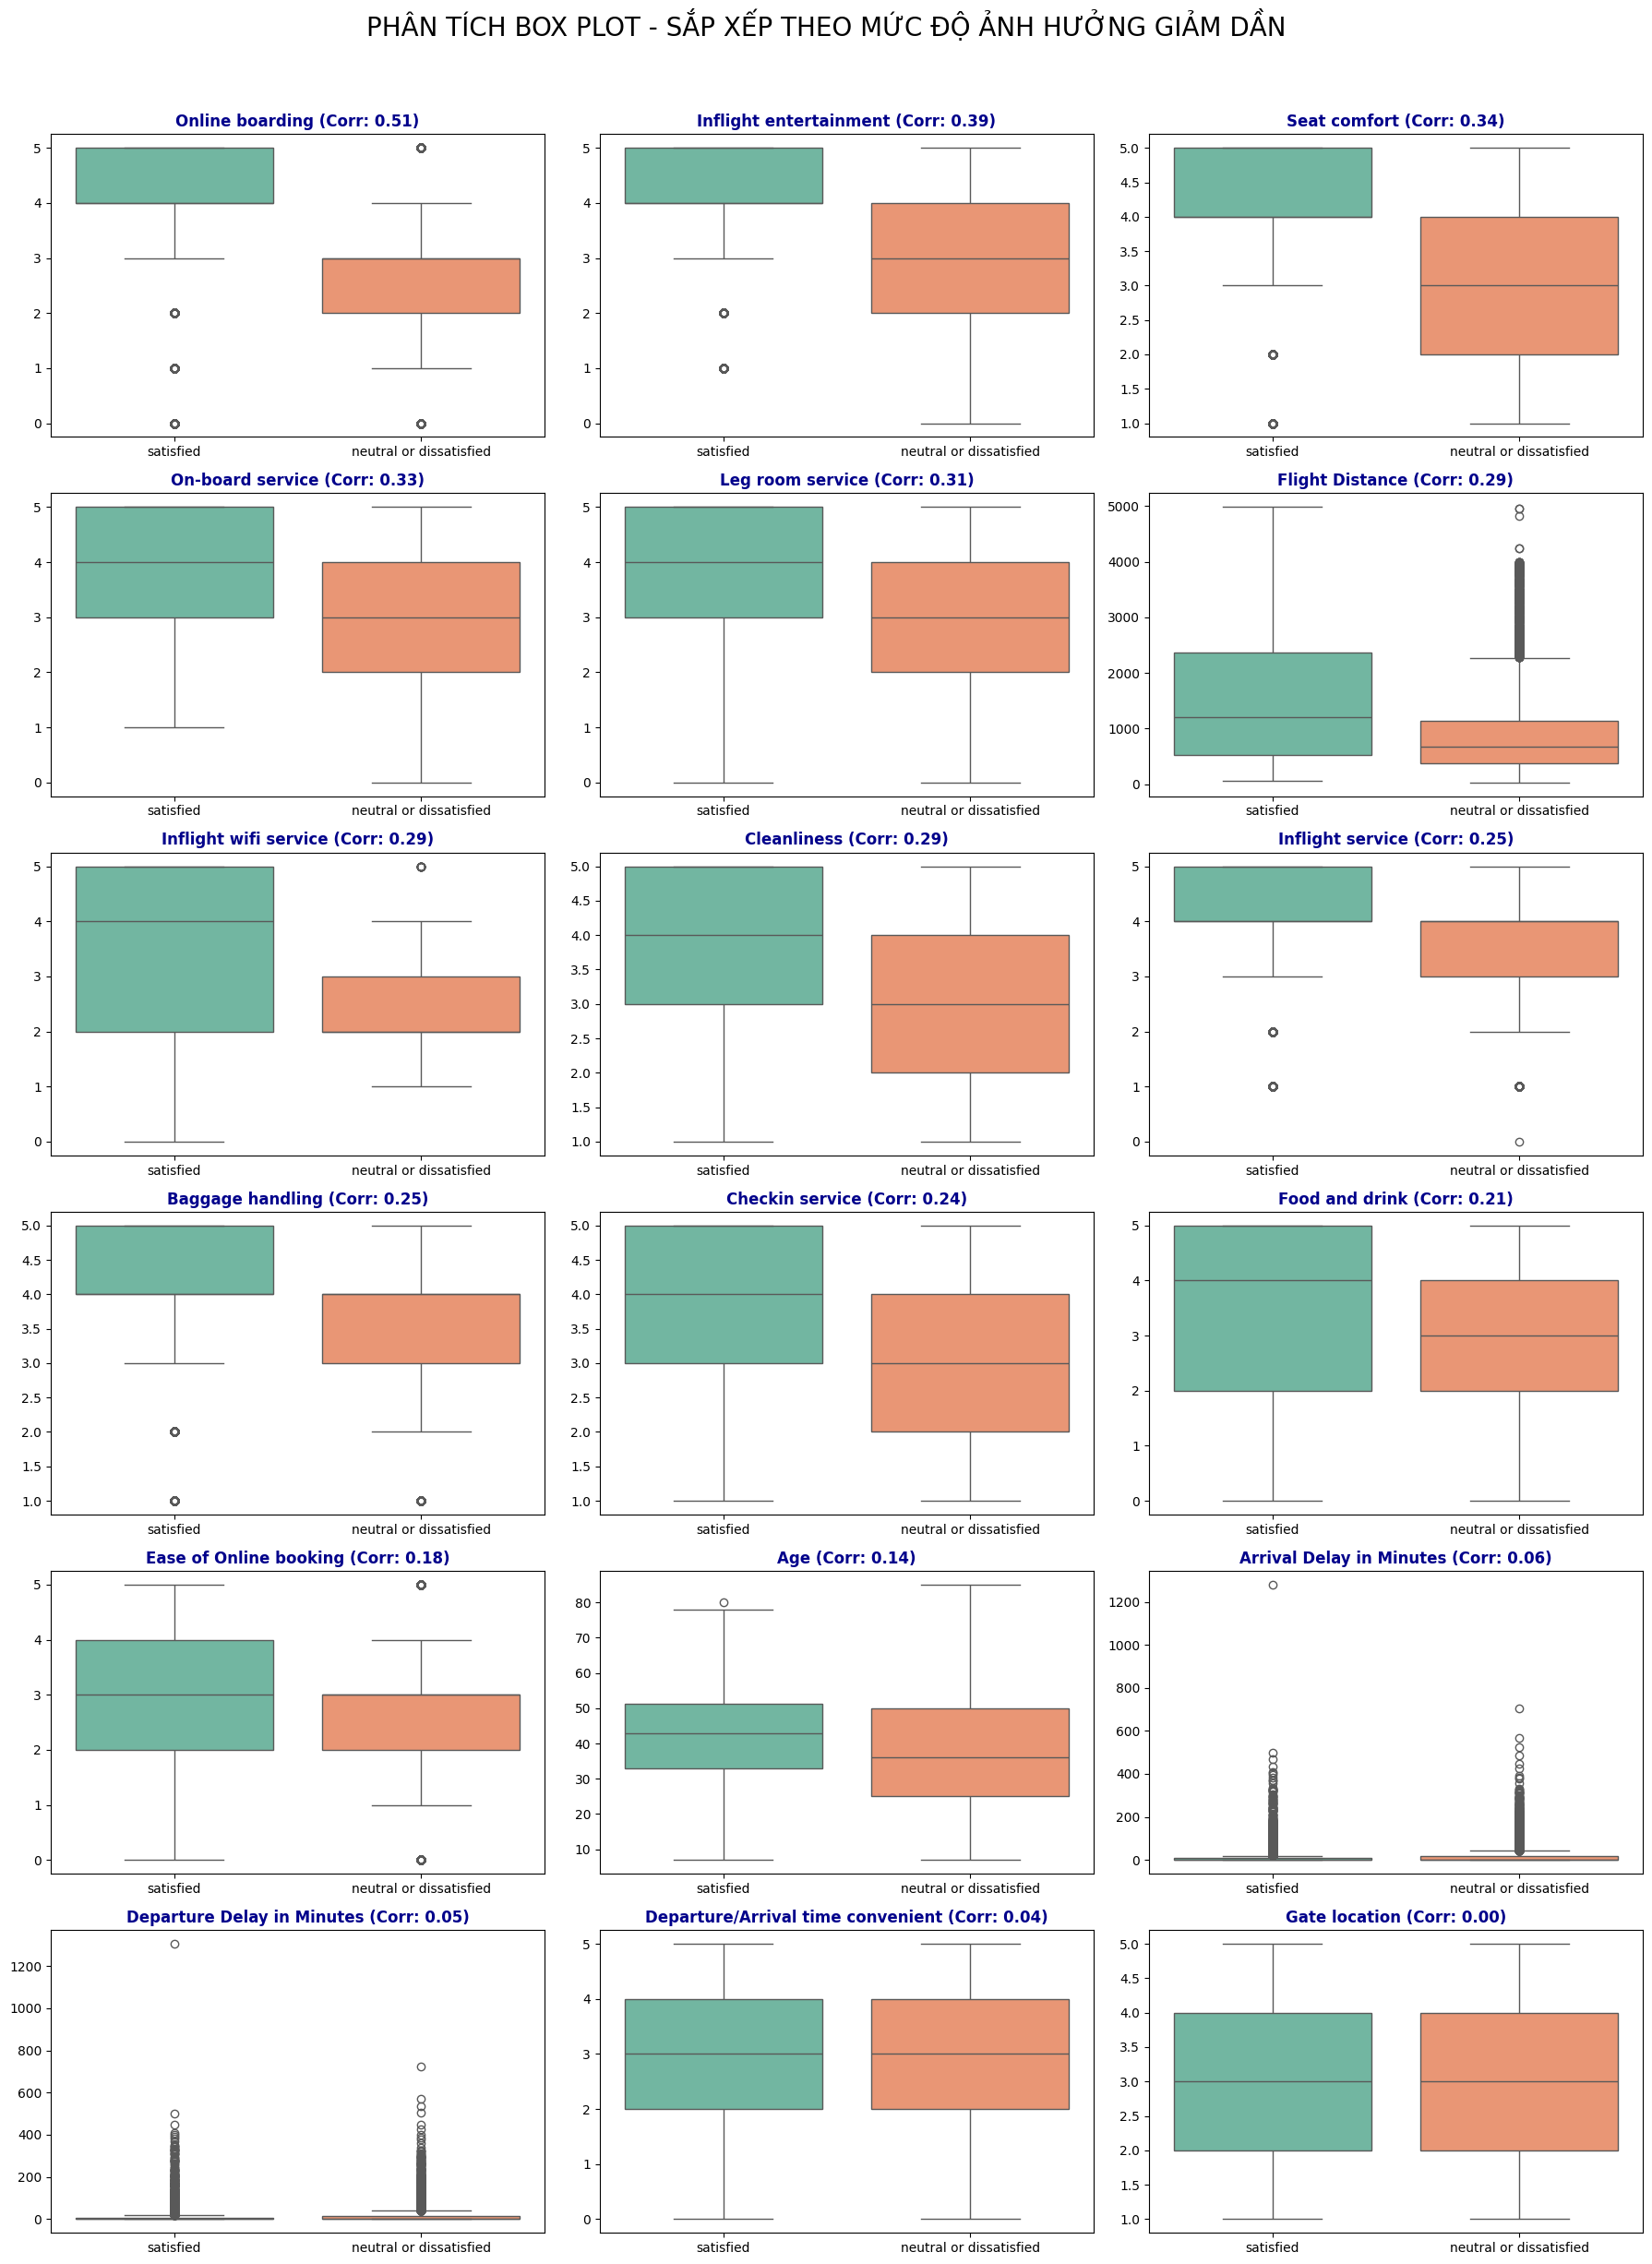

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
# 4. Tìm các feature quan trọng bằng EDA để sàng lọc trực quan
# Tính tương quan tuyệt đối với target (lấy trị tuyệt đối vì tương quan âm hay dương đều là có ảnh hưởng)
correlations = train_set[num_cols].corrwith(train_set['Target']).abs()

# Sắp xếp giảm dần (Feature xịn lên đầu)
sorted_cols = correlations.sort_values(ascending=False).index.tolist()

print("Thứ tự mức độ ảnh hưởng (từ cao xuống thấp):")
print(correlations.sort_values(ascending=False))

# Vẽ Box Plot theo thứ tự đã sắp xếp để EDA của các cột Numberical
n_cols = 3
n_rows = math.ceil(len(sorted_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 24))
axes = axes.flatten()

for i, col in enumerate(sorted_cols):
    # Vẽ Box Plot
    sns.boxplot(data=train_set, x='satisfaction', y=col, ax=axes[i], palette='Set2')
    
    # Thêm tiêu đề có kèm chỉ số tương quan để thầy cô thấy độ chuyên nghiệp
    corr_score = correlations[col]
    axes[i].set_title(f'{col} (Corr: {corr_score:.2f})', fontsize=12, fontweight='bold', color='darkblue')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Xóa ô thừa
for i in range(len(sorted_cols), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('PHÂN TÍCH BOX PLOT - SẮP XẾP THEO MỨC ĐỘ ẢNH HƯỞNG GIẢM DẦN', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

Đánh giá các biểu đồ boxplot để chọn các cột Numberical cho máy học:
1. Dựa trên Hệ số Tương quan (Correlation) cao nhất:
- Online boarding (Corr: 0.51): Đây là yếu tố ảnh hưởng mạnh nhất (Top 1).
- Inflight entertainment (Corr: 0.39): Ảnh hưởng mạnh thứ 2.
- Seat comfort (Corr: 0.34): Ảnh hưởng mạnh thứ 3.
- On-board service (Corr: 0.33): Ảnh hưởng mạnh thứ 4.
- Inflight wifi service (Corr: 0.29): Tuy đứng sau Leg room một chút (0.31) nhưng vẫn thuộc nhóm có tương quan cao.
2. Dựa trên sự "Phân tách" rõ rệt của biểu đồ hộp (Boxplot)
- Sự chênh lệch về Trung vị (Median - đường kẻ ngang trong hộp):
    + Đặc biệt là Online boarding và Inflight entertainment, đường trung vị của nhóm Hài lòng (Xanh) thường nằm ở mức 4 hoặc 5.
    + Trong khi đó, đường trung vị của nhóm Không hài lòng (Cam) chỉ nằm ở mức 3 hoặc thấp hơn.
    + Ý nghĩa: Chỉ cần nhìn vào điểm số trung bình, ta đã thấy sự khác biệt rõ rệt giữa hai nhóm khách hàng.
- Sự ít chồng lấn (Overlapping):
    + Nhìn vào biểu đồ Online boarding: Hộp màu xanh (phần lớn dữ liệu tập trung từ 4-5 điểm) nằm hoàn toàn phía trên hộp màu cam (tập trung từ 2-3 điểm).
    + Ý nghĩa: Dữ liệu ít bị chồng lấn đồng nghĩa với việc mô hình máy học sẽ dễ dàng 'vẽ' ra được đường ranh giới để phân loại khách hàng, giúp tăng độ chính xác (Accuracy).
3. Dựa vào tính thực tế: Hãng hàng không sẽ chia ra ba phân khúc để xét các yếu tố đánh giá sự hài lòng của khách hàng trải nghiệm dịch vụ, đó là: trước khi bay, trong khi bay và sau khi bay.
- Trước bay: Online boarding, checkin service, Ease of Online booking,...
- Trong bay: Inflight entertainment, On-board service, Seat comfort, Legroom service, Cleanliness, Inflight service, Food and drink,...
- Sau bay: Flight distance, Departure/Arrival time convenient,...
4. Tính trùng lặp ý nghĩa của biến. Ví dụ ở đây ta thấy Feature 'Seat comfort' có nghĩa là Ghế ngồi thoải mái và biến 'Legroom service' là chỗ để chân của khách khi ngồi thì hai biến này nó đều thể hiện sự thoải mái của chỗ ngồi nên nhóm sẽ lượt bỏ bớt để lấy feature có ý nghĩa bao hàm các feature có nội dung tương ứng.

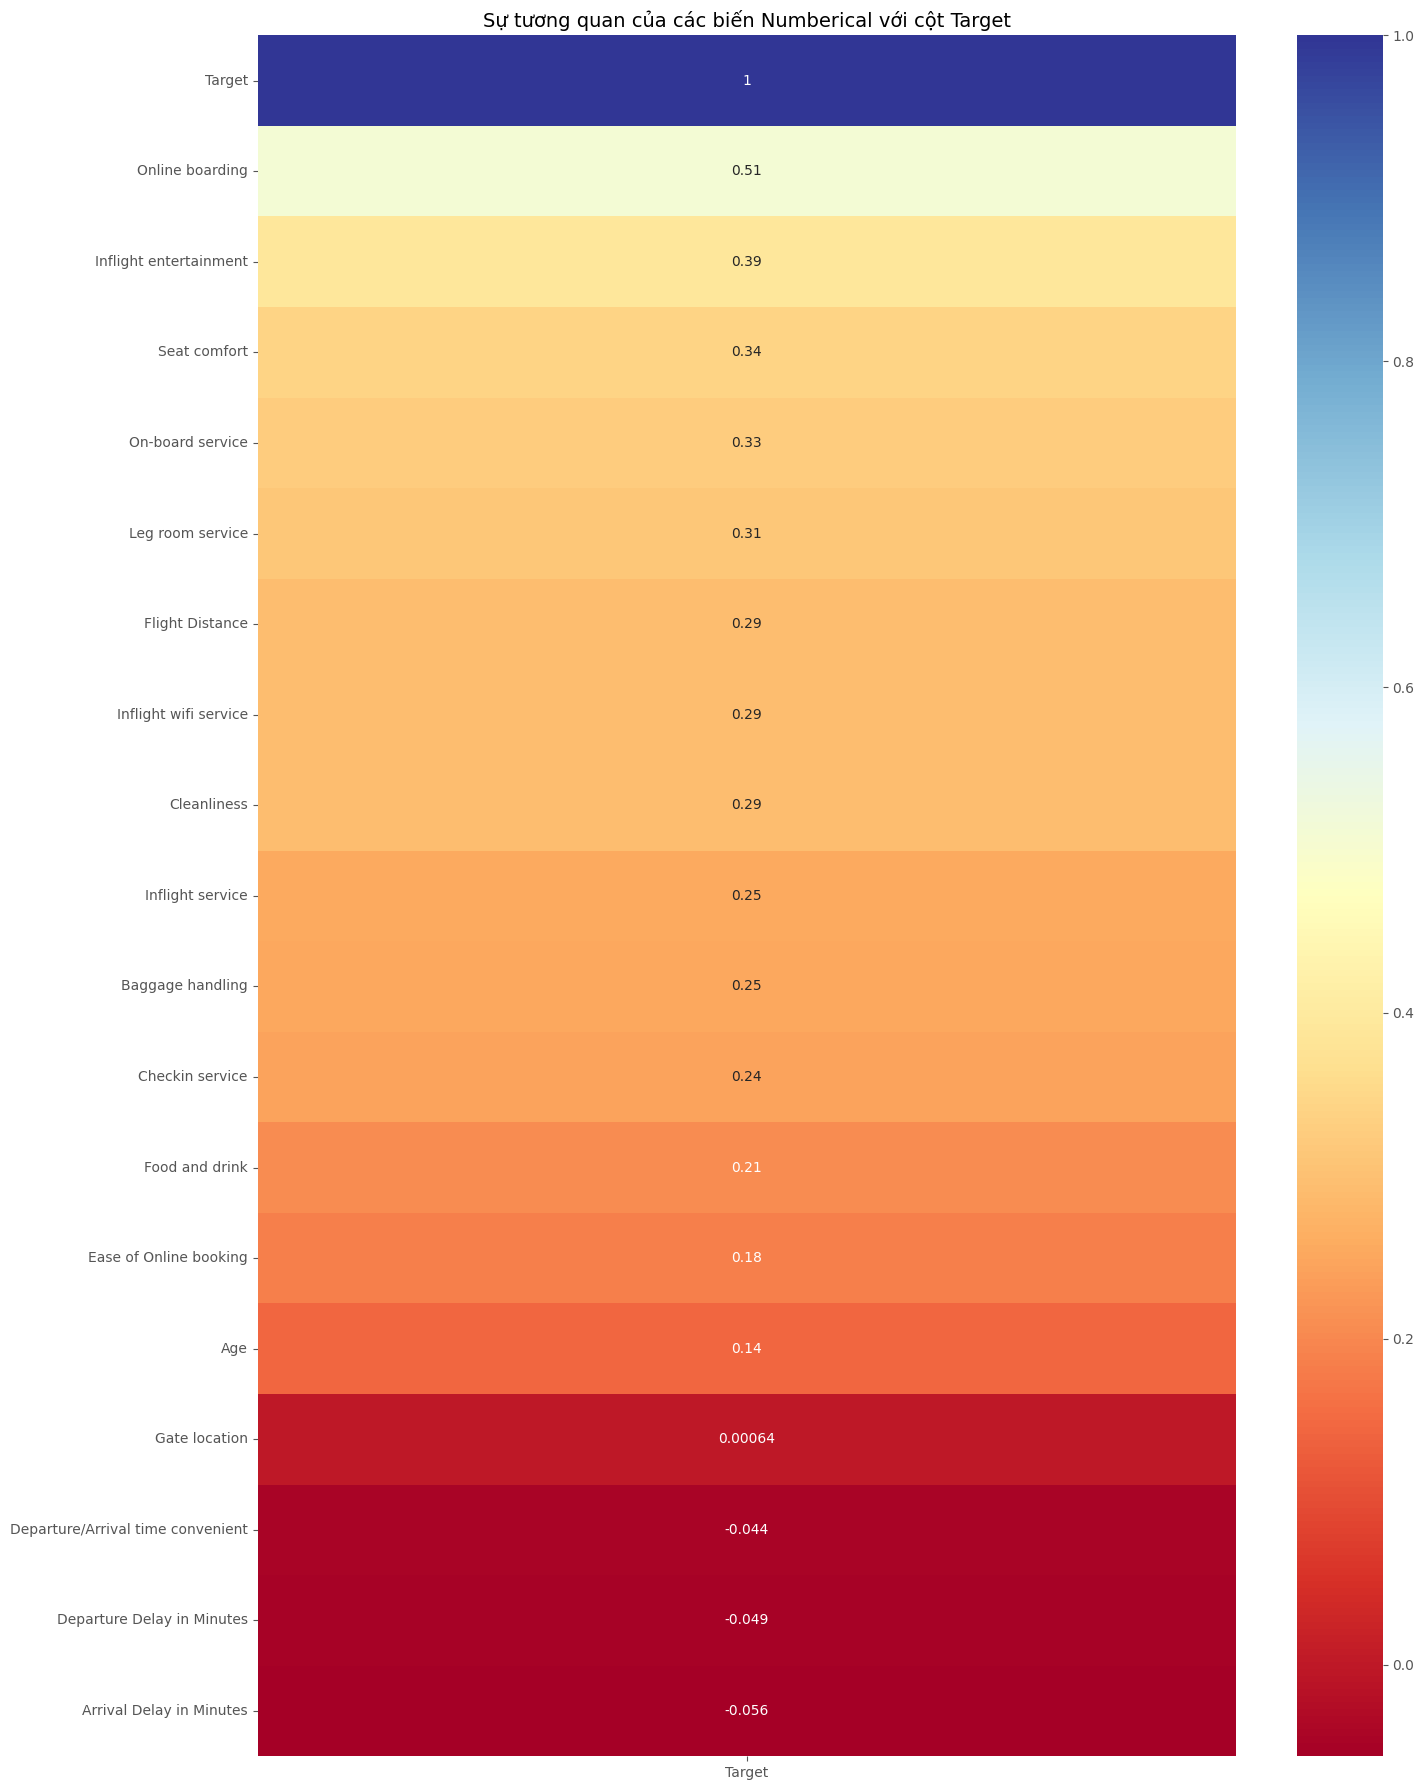

In [19]:
# 4. Tìm các feature quan trọng bằng EDA để sàng lọc trực quan
import matplotlib.pyplot as plt
import seaborn as sns  
# Khởi tạo cấu hình đồ thị
plt.style.use('ggplot')
plt.subplots(1, 1, figsize=(15,18))
# EDA của các cột Numberical
# Tính ma trận tương quan của các biến Numberical với Target
corr_matrix = train_set[num_cols + ['Target']].corr()                           #Tính maxtrix theo từng cặp cột với nhau
# Biểu thị tính tương quan giảm dần của các biến Numberical với Target
target_matrix = corr_matrix['Target'].sort_values(ascending=False).to_frame()   #Lấy ra maxtrix của các cột so với cột Target, được sx giảm dần và chuyển thành dataframe

# Biểu đồ
sns.heatmap(target_matrix, annot=True, cmap='RdYlBu')
plt.title('Sự tương quan của các biến Numberical với cột Target', fontsize=14)

plt.tight_layout()
plt.show()


Kết quả lựa chọn biến Numberical dựa theo biểu đồ:
- Yếu tố 1: Dựa theo phương pháp Correlation-based Feature Selection, khoảng từ 0.5 < r < 1 thể hiện sự quan mạnh gồm có biến 'Online Boarding' nên nhóm sẽ quyết định lấy thêm nhóm có mức độ tương quan trung bình có 0.3 < r < 0.5 sẽ gồm thêm biến 'Inflight entertainment', 'On-board service', 'Seat comfort', 'Legroom service'. Những biến dưới mức 0.3 được coi là có mối quan hệ yếu hoặc không đáng kể, nếu đưa vào sẽ gây hiện tượng Overfitting (quá khớp), khiến máy học những quy luật ngẫu nhiên thay vì bản chất.
- Yếu tố 2: Dựa vào tính thực tế: Hãng hàng không sẽ chia ra ba phân khúc để xét các yếu tố đánh giá sự hài lòng của khách hàng trải nghiệm dịch vụ, đó là: trước khi bay, trong khi bay và sau khi bay.
```
+ Trước bay: Online boarding, checkin service, Ease of Online booking,...
+ Trong bay: Inflight entertainment, On-board service, Seat comfort, Legroom service, Cleanliness, Inflight service, Food and drink,...
+ Sau bay: Flight distance, Departure/Arrival time convenient,...
```
- Yếu tố 3: Tính trùng lặp ý nghĩa của biến. Ví dụ ở đây ta thấy Feature 'Seat comfort' có nghĩa là Ghế ngồi thoải mái và biến 'Legroom service' là chỗ để chân của khách khi ngồi thì hai biến này nó đều thể hiện sự thoải mái của chỗ ngồi nên nhóm sẽ lượt bỏ bớt để lấy feature có ý nghĩa bao hàm các feature có nội dung tương ứng.

=> Dựa trên những yếu tố đó và để đảm bảo mức độ toàn diện nhiều khía cạnh để đánh giá độ hài lòng của khách hàng, nhóm sẽ tập trung vào các biến Numberical sau: 

        + 'Online Boarding'
        + 'Inflight entertainment'
        + 'On-board service'
        + 'Seat comfort'
        + 'Inflight wifi service' (biến này được chọn bởi vì hiện nay đa số khắp mọi nơi đều có dịch vụ wifi để đáp ứng khách hàng nên đối với những chuyến bay có dịch vụ này có thể được coi là 1 điểm cộng lớn đối với những khách hàng đi làm, hay trẻ em học sinh nên nhóm sẽ đưa vào để cân nhắc xem có nên đầu tư vào dịch vụ này để phát triển hơn hay không).

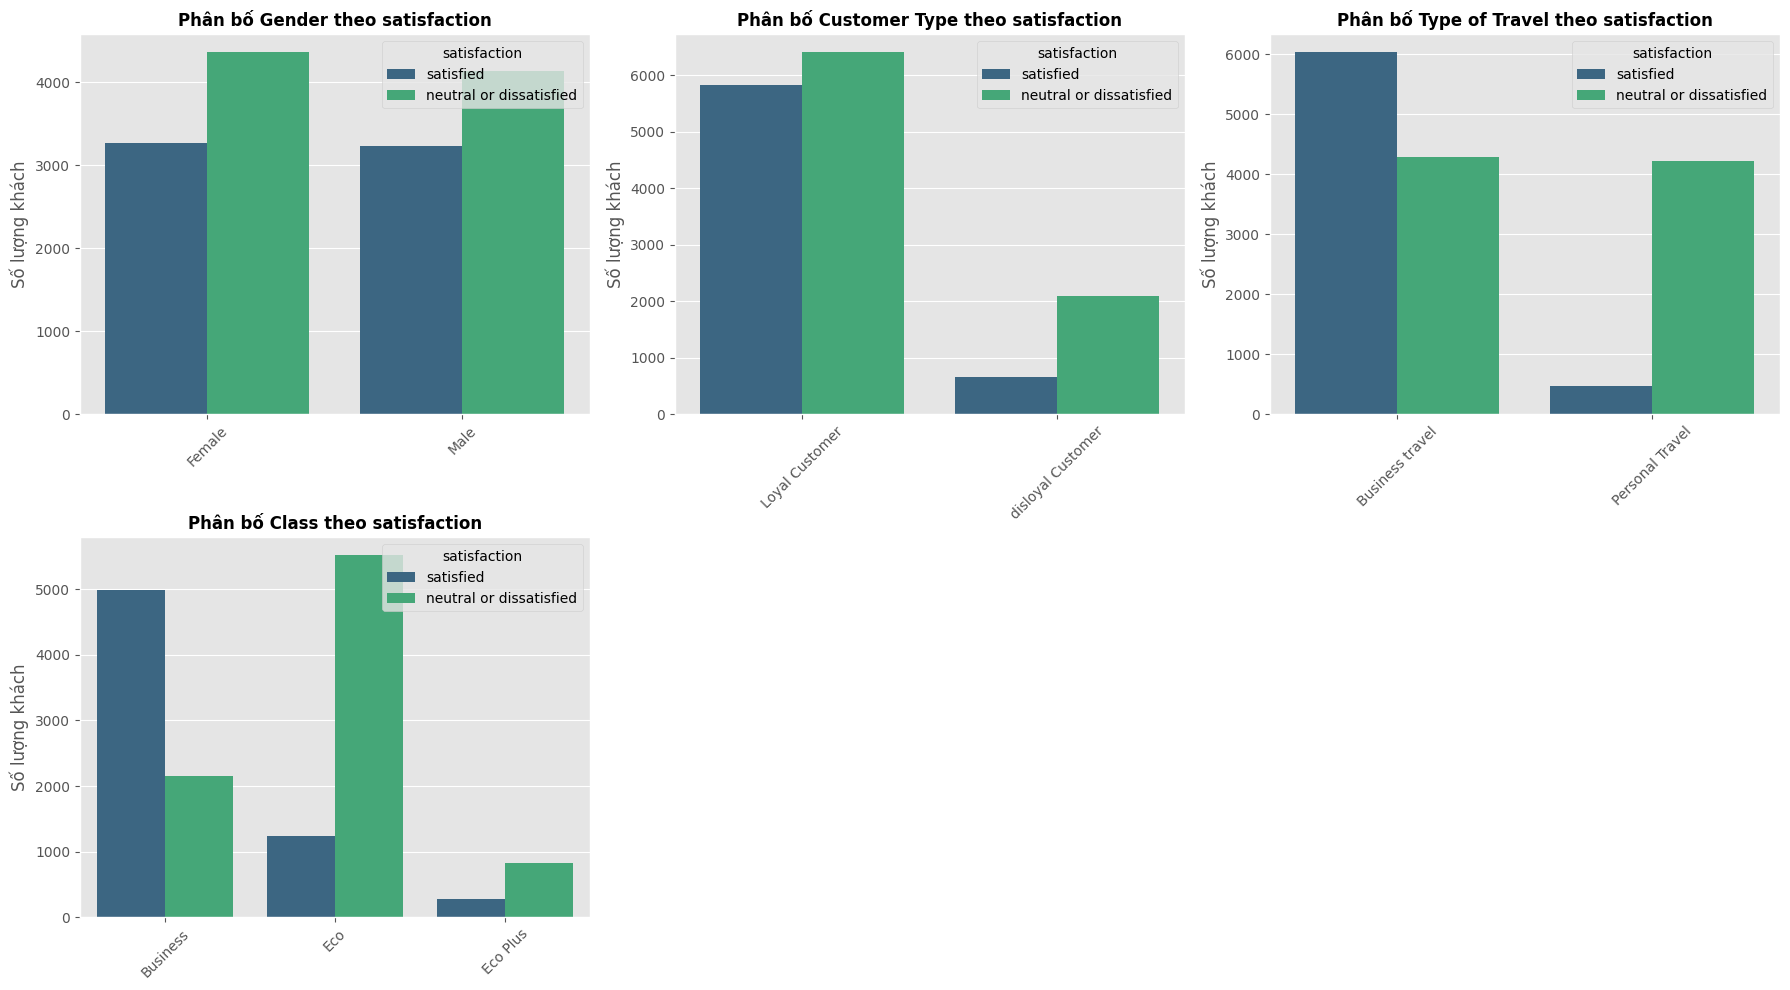

In [20]:
# EDA cho biến Categorical
# 1. Khởi tạo khung lưới (2 dòng, 3 cột)
# flatten() giúp biến mảng axes 2 chiều thành 1 chiều để dễ chạy vòng lặp
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten() 

# 2. Chạy vòng lặp qua danh sách biến chữ
for i, col in enumerate(cat_cols):
    # Vẽ biểu đồ vào đúng ô tương ứng
    sns.countplot(data=train_set, x=col, hue='satisfaction', ax=axes[i], palette='viridis')
    
    # Tùy chỉnh tiêu đề và nhãn
    axes[i].set_title(f'Phân bố {col} theo satisfaction', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('') # Ẩn tên cột dưới trục X cho đỡ rối
    axes[i].set_ylabel('Số lượng khách')

# 3. Xóa các ô trống nếu số lượng cột ít hơn 6 (tránh để ô trắng vô duyên)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Kết quả lựa chọn biến Categorical dựa theo biểu đồ như sau:
- 'Type of Travel' & 'Class': Đây chắc chắn là 2 biến chủ chốt. Ở Business Travel tỷ lệ hài lòng cao vọt, trong khi Personal Travel lại thấp lè tè. Sự phân hóa này cực kỳ giúp ích cho máy học.
- 'Customer Type': Cũng rất tiềm năng vì khách Loyal thường có tỷ lệ hài lòng ổn định hơn khách disloyal.
- 'Gender': Mức độ giữa Female và Male trông gần như y hệt nhau. Tỷ lệ xanh/xám là tương đương. => Đây là biến nhiễu, không nên chọn vào Top 10 vì nó không giúp máy phân biệt được ai hài lòng, ai không.
- 'Arrival Delay in Munites': dữ liệu không tạo ra được sự phân hóa (mẫu hình), máy học sẽ không thể dựa vào đó để phân loại khách hàng được.

=> Dựa trên những yếu tố đó, nhóm sẽ tập trung vào các biến Categorical sau: 

        + 'Type of Travel'
        + 'Class'
        + 'Customer Type'

In [21]:
# 5. Chốt các feature quan trọng sau EDA
# Định nghĩa danh sách các đặc trưng đã chọn (8 biến)
golden_features = [
    'Online boarding', 
    'Inflight entertainment', 
    'On-board service', 
    'Seat comfort', 
    'Inflight wifi service',
    'Type of Travel', 
    'Class', 
    'Customer Type'
]

# Tạo tập dữ liệu cuối cùng (Chỉ giữ lại 8 cột này và cột mục tiêu)
# Chúng ta lọc trên cả train_set và test_set để đồng bộ
train_final = train_set[golden_features + ['Target']].copy()
test_final = test_set[golden_features + ['Target']].copy()

# 3. Kiểm tra lại thông tin
print(' Đã trích xuất thành công 8 Chỉ số Vàng.')
print(f' Kích thước tập Train mới: {train_final.shape}')
print(f' Kích thước tập Test mới: {test_final.shape}')
print('\nCác cột dữ liệu sẵn sàng cho phân tích:')
display(train_final.head())

 Đã trích xuất thành công 8 Chỉ số Vàng.
 Kích thước tập Train mới: (15000, 9)
 Kích thước tập Test mới: (25976, 9)

Các cột dữ liệu sẵn sàng cho phân tích:


,Online boarding,Inflight entertainment,On-board service,Seat comfort,Inflight wifi service,Type of Travel,Class,Customer Type,Target
0,1.0,4.0,4.0,4.0,0.0,Business travel,Business,disloyal Customer,1
1,4.0,4.0,4.0,5.0,5.0,Business travel,Business,Loyal Customer,1
2,3.0,4.0,5.0,4.0,3.0,Personal Travel,Eco,Loyal Customer,0
3,4.0,5.0,5.0,4.0,2.0,Personal Travel,Eco,Loyal Customer,0
4,4.0,2.0,1.0,2.0,5.0,Business travel,Eco,disloyal Customer,1


In [22]:
#Xuất dữ liệu train_final và test_final ra file csv
train_final.to_csv('D:/DATA1/Study/DA/APM02/FinalProject_HoaPhuoc_APM02/Dataset/train_final.csv', index=False)
test_final.to_csv('D:/DATA1/Study/DA/APM02/FinalProject_HoaPhuoc_APM02/Dataset/test_final.csv', index=False)

------------------------------------------------------------------------------------------------------------------------------------------------------------

IV. Khai thác Insight và EDA (Exploratory Data Analysis)

- EDA theo hướng như sau:

1. Khai thác "Cụm dịch vụ": Trong hàng không, các dịch vụ không đứng độc lập. Ví dụ, nếu khách hàng thấy ghế ngồi thoải mái (Seat comfort), họ sẽ có tâm lý dễ dãi hơn khi đánh giá giải trí (Inflight entertainment) => Giúp doanh nghiệp biết nên nâng cấp đồng bộ những gì. Thay vì đầu tư dàn trải, hãng nên tập trung vào những "cụm dịch vụ" có liên quan mật thiết để tối ưu hóa độ hài lòng của khách hàng ở một khía cạnh.
```
=> Phối hợp dịch vụ.
```
2. Xác định tiêu chuẩn tối thiểu của khách hàng với feature mạnh nhất là Online boarding. Điểm số từ 1-5 sẽ có ý nghĩa nếu ta biết khách hàng bắt đầu hài lòng từ điểm nào là tối thiểu. Ví dụ: Nếu biểu đồ của Online boarding cho thấy khách hài lòng chỉ xuất hiện khi điểm > 4, thì mọi nỗ lực cải thiện từ 1 lên 3 điểm vẫn là "vô ích". Hãng phải mục tiêu đạt ngưỡng 4+ mới có kết quả.
```
=> Đâu là mức tối thiểu để làm khách hàng vui?
```
3. Phân khúc khách hàng mục tiêu: Ta cần biết ai là người đang nuôi sống hãng và ai là người không và ít khi.
```
=> Khách hàng nào VIP?
```

Kích thước Train: (15000, 9)
Kích thước Test: (25976, 9)


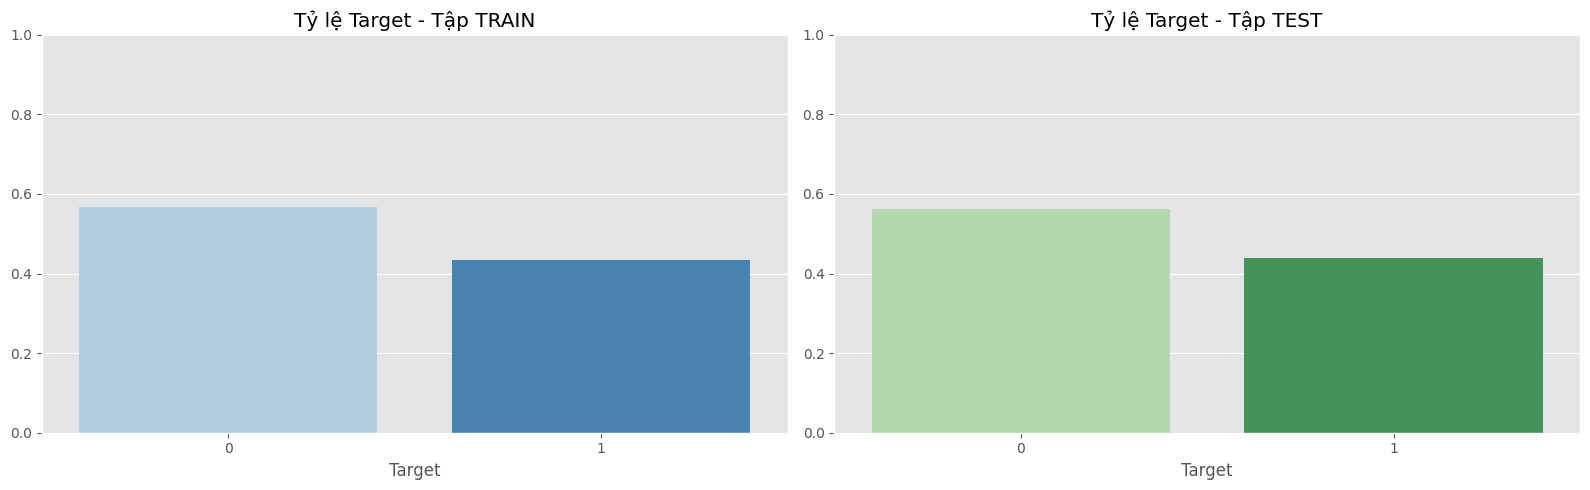


Check Null Train:
 0
Check Null Test:
 0


In [23]:
# 1. Kiểm tra phân phối Target giữa Train và Test sau khi lọc
#Kiểm tra nhanh cấu trúc
print("Kích thước Train:", train_final.shape)
print("Kích thước Test:", test_final.shape)

# So sánh phân phối Target giữa Train và Test
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Tính tỷ lệ % để so sánh cho chuẩn (vì số lượng dòng 2 file khác nhau)
train_target_pct = train_final['Target'].value_counts(normalize=True).sort_index()
test_target_pct = test_final['Target'].value_counts(normalize=True).sort_index()

sns.barplot(x=train_target_pct.index, y=train_target_pct.values, ax=axes[0], palette='Blues')
axes[0].set_title('Tỷ lệ Target - Tập TRAIN')
axes[0].set_ylim(0, 1) # Cố định trục Y để dễ so sánh

sns.barplot(x=test_target_pct.index, y=test_target_pct.values, ax=axes[1], palette='Greens')
axes[1].set_title('Tỷ lệ Target - Tập TEST')
axes[1].set_ylim(0, 1)
plt.tight_layout()
plt.show()

# Kiểm tra null lần cuối
print("\nCheck Null Train:\n", train_final.isnull().sum().sum())
print("Check Null Test:\n", test_final.isnull().sum().sum())

=> Mô hình tốt, tỷ lệ cột mục tiêu không có chênh lệch đáng kể

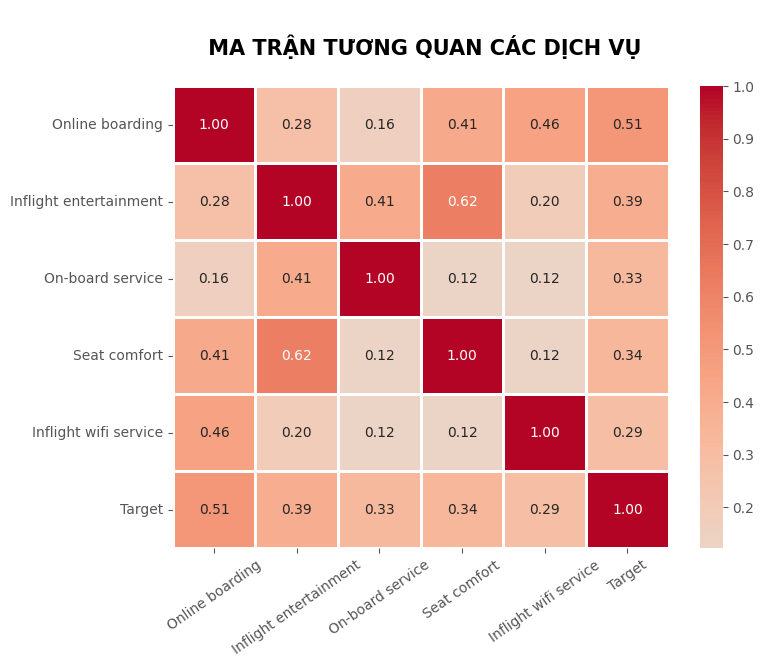

In [24]:
# 1. Khai thác "Cụm dịch vụ":
# Lọc cột biến Numberical để khai thác cụm dịch vụ
num = train_final.select_dtypes(include=[np.number])

#Vẽ heatmap matrix tương quan giữa các biến số
plt.figure(figsize=(8, 6))
sns.heatmap(num.corr(), annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=1)
plt.xticks(rotation=35)
plt.title('\n MA TRẬN TƯƠNG QUAN CÁC DỊCH VỤ\n', fontsize=15, fontweight='bold')
plt.show()

Đánh giá dựa theo biểu đồ heatmap:

Nhóm 1 - Cụm "Tiện nghi tại chỗ": 'Seat comfort' và 'Inflight entertainment' (chỉ số tương quan = 0.62 - Mức cao nhất).
- Đánh giá theo r=0.62: Hệ số này nằm trong khung "Cộng hưởng cao" (0.6 - 1.0), chứng tỏ sự biến thiên của hai dịch vụ này gần như đồng nhất.
- Phân tích: Đây là "Trải nghiệm tĩnh". Khách hàng đánh giá dựa trên trạng thái cơ thể khi ngồi yên một chỗ. Ghế ngồi là phần cứng (vật lý), giải trí là phần mềm (cảm xúc). Nếu ghế không êm gây đau lưng, não bộ sẽ rơi vào trạng thái khó chịu, khiến khách hàng không còn tâm trí để thưởng thức phim ảnh hay âm nhạc dù nó có hay đến đâu.
- Kiến nghị: Nếu ngân sách hạn hẹp, hãy ưu tiên bảo trì ghế ngồi trước khi mua bản quyền phim mới. Một cái ghế thoải mái có thể giúp khách hàng "dễ tính" hơn với một kho phim trung bình, nhưng điều ngược lại là không thể.
```
=> Ưu tiên 1 (Cụm Tiện nghi): Cần nâng cấp đồng bộ theo gói.
```
Nhóm 2 - Nhóm "Chìa khóa chiến lược - Số hóa": 'Online boarding' và 'Inflight wifi service'. 
- Đánh giá theo r=0.46: Mức tương quan Trung bình khá. Con số này phản ánh một nhóm khách hàng đặc thù.
- Phân tích: Đây đại diện cho "Hành trình số" (Digital Journey). Những người thành thạo công nghệ để tự làm thủ tục trực tuyến thường là những người có nhu cầu kết nối internet cao nhất khi ở trên không (để làm việc hoặc giữ liên lạc).
- Kiến nghị: Đây là "mũi nhọn" để tăng điểm hài lòng mà không tốn quá nhiều chi phí vật lý. Triển khai gói "Seamless Connectivity". Tặng code Wifi tốc độ cao ngay trên vé điện tử sau khi khách hoàn thành Online Boarding. Điều này vừa kích khích khách dùng App (giảm tải nhân sự mặt đất), vừa tăng điểm đánh giá Wifi.
```
=> Ưu tiên 2 (Cụm Công nghệ): Dùng để thu hút khách hàng trẻ/công sở.
```
Nhóm 3 - Cụm "Dịch vụ độc lập": 'Inflight wifi service' với 'On-board service' và 'Seat comfort'.
- Đánh giá theo r=0.12: Hệ số tương quan r = 0.12 là mức tương quan yếu (gần như không có liên hệ). Điểm số của Wifi không hề ảnh hưởng đến cách khách hàng nhìn nhận về sự phục vụ của tiếp viên hay độ êm của cái ghế.
- Phân tích: Sự nhiệt tình của tiếp viên (On-board service) không thể khỏa lấp được nỗi bực mình khi Wifi hỏng. Công nghệ và Con người là hai đường thẳng song song trong trải nghiệm này.
- Kiến nghị: Cần có ngân sách riêng biệt cho hạ tầng công nghệ. Đừng chỉ tập trung đào tạo tiếp viên mà quên mất rằng trong kỷ nguyên số, một đường truyền internet ổn định đôi khi quan trọng hơn một nụ cười của nhân viên đối với nhóm khách hàng Business.
```
=> Ưu tiên 3 (Dịch vụ độc lập): Cần đầu tư chuyên biệt, không lấy cái này bù đắp cho cái kia.
```


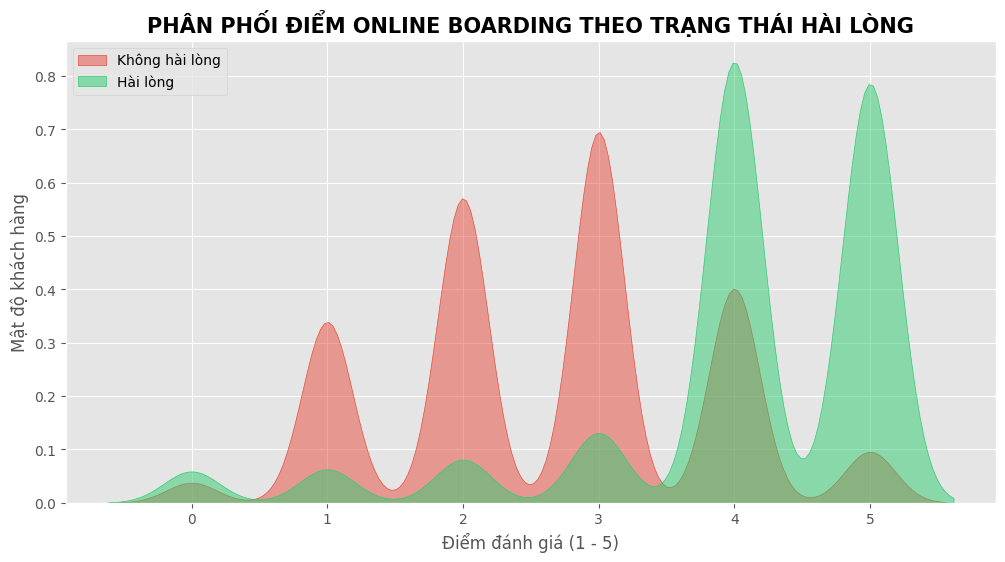

In [25]:
# 2. Xác định tiêu chuẩn tối thiểu của khách hàng với feature mạnh nhất là Online boarding
# Thiết lập biểu đồ
plt.figure(figsize=(12, 6))

#Vẽ đường mật độ cho Online boarding phân theo Target (hài lòng và không hài lòng)
sns.kdeplot(data=train_final[train_final['Target']==0]['Online boarding'], label='Không hài lòng', fill=True, shade=True, color='#e74c3c', alpha=0.5)
sns.kdeplot(data=train_final[train_final['Target']==1]['Online boarding'], label='Hài lòng', fill=True, shade=True, color='#2ecc71', alpha=0.5)
plt.title('\nPHÂN BỐ ĐIỂM ONLINE BOARDING THEO MỨC ĐỘ HÀI LÒNG CỦA KHÁCH HÀNG\n', fontsize=15, fontweight='bold')

# Trang trí biểu đồ
plt.title('PHÂN PHỐI ĐIỂM ONLINE BOARDING THEO TRẠNG THÁI HÀI LÒNG', fontsize=15, fontweight='bold')
plt.xlabel('Điểm đánh giá (1 - 5)')
plt.ylabel('Mật độ khách hàng')
plt.legend()
plt.show()

Đánh giá kết quả:
- Hiện trạng: 
    + Điểm 3 là "vùng nguy hiểm": Đa số khách hàng chấm 3 sao đều cảm thấy Không hài lòng (màu đỏ chiếm ưu thế). Đây là nhóm khách hàng "suýt mất" vào tay đối thủ.
    + Điểm 4 là "ngưỡng tích cực": Chỉ cần bước từ 3 lên 4 sao, khách hàng sẽ chuyển trạng thái sang Hài lòng (màu xanh bùng nổ).
- Phân tích:
    + Lỗi hệ thống (Điểm 1-2): Hệ thống bị lỗi, không thể làm thủ tục, khách phải ra quầy.
    + Sự phiền toái (Điểm 3): Hệ thống chạy được nhưng chậm, giao diện khó dùng trên điện thoại, hoặc bắt nhập đi nhập lại thông tin. Đây là mức "làm cho xong chuyện" chứ không phải trải nghiệm tốt.
    + Sự mượt mà (Điểm 4-5): Thao tác nhanh, không lỗi, tích hợp được vào ví điện tử (Apple/Google Wallet).
- Kiến nghị:
    + Xử lý "vùng 3 sao" (Ưu tiên số 1):
    ```
    - Rà soát lại giao diện mobile. Loại bỏ mọi bước nhập liệu không cần thiết.
    - Tự động điền thông tin khách hàng cũ từ dữ liệu thành viên (CRM).
    - Đảm bảo tốc độ tải trang dưới 2 giây.
    ```
    + Củng cố "vùng 4-5 sao":
    ```
    - Tặng ngay một quyền lợi nhỏ (Ví dụ: Voucher giảm giá dịch vụ tại sân bay hoặc tích thêm điểm thưởng) ngay khi khách hoàn tất Online Boarding mượt mà.
    - Gửi thông báo đẩy (Push Notification) nhắc nhở thời gian ra cửa khởi hành để tạo cảm giác được chăm sóc tận răng.
    ```
    + Quản trị rủi ro:
    ```
    - Lập trình khảo sát siêu ngắn (1 câu hỏi) chỉ dành riêng cho nhóm chấm 3 sao để tìm đúng "hạt sạn" kỹ thuật đang nằm ở đâu và sửa ngay lập tức.
    ```

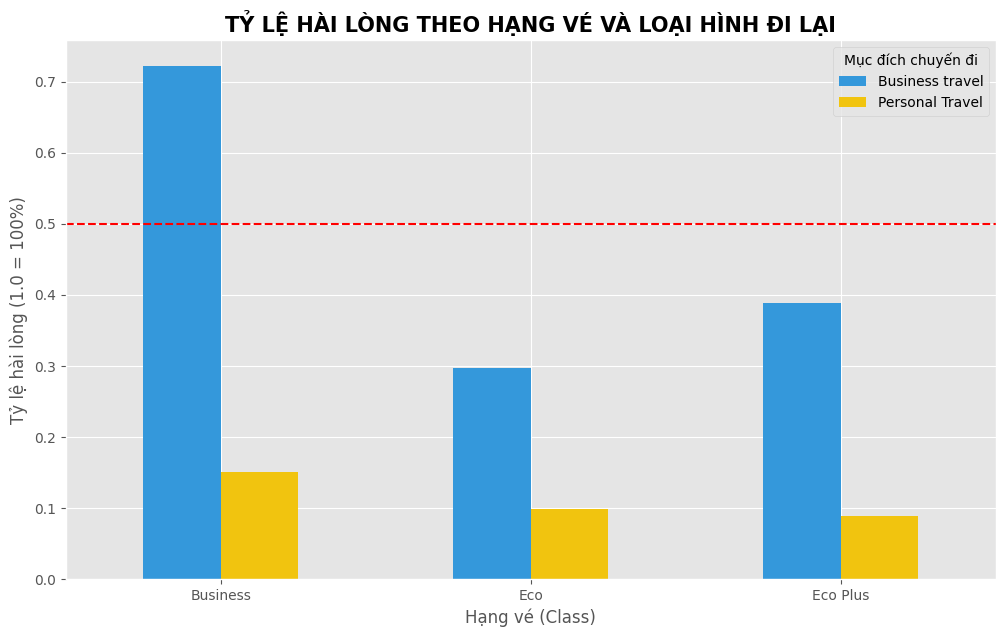

In [26]:
# 3. Phân khúc khách hàng mục tiêu dựa theo feature loại vé và loại hình đi lại
# Chúng ta dùng hàm pivot_table để tính tỷ lệ % (trung bình của Target 0-1)
segment_analysis = train_final.pivot_table(index='Class', columns='Type of Travel', values='Target', aggfunc='mean')

# 2. Vẽ biểu đồ cột chồng (hoặc cột nhóm để so sánh tỷ lệ)
segment_analysis.plot(kind='bar', figsize=(12, 7), color=['#3498db', '#f1c40f'])

# Trang trí
plt.title('TỶ LỆ HÀI LÒNG THEO HẠNG VÉ VÀ LOẠI HÌNH ĐI LẠI', fontsize=15, fontweight='bold')
plt.xlabel('Hạng vé (Class)')
plt.ylabel('Tỷ lệ hài lòng (1.0 = 100%)')
plt.xticks(rotation=0)
plt.axhline(0.5, color='red', linestyle='--') # Đường tham chiếu 50%
plt.legend(title='Mục đích chuyến đi')
plt.show()


Đánh giá:
- Hiện trạng: 
    + Bất đối xứng hài lòng: Chỉ khách đi công tác (Business travel) hạng thương gia mới thực sự hài lòng (>70%).
    + Thất bại ở nhóm cá nhân: Khách đi du lịch (Personal travel) có tỷ lệ hài lòng cực thấp (<15%), bất kể họ mua vé hạng sang hay hạng thường.
- Phân tích: 
    + Nghịch lý hạng vé Eco: Khách đi công tác ở hạng Eco (vé rẻ hơn) lại có tỷ lệ hài lòng cao gấp khoảng 3 lần so với khách đi du lịch ở hạng Business (vé đắt nhất). 
    + Khách du lịch cảm thấy "không đáng" vì quy trình phục vụ hiện tại đang tập trung quá mức vào sự nhanh gọn (hợp với dân công sở) mà bỏ quên sự chăm sóc trải nghiệm (thứ khách du lịch cần).
    + Sự thất bại của Eco Plus: Hạng vé này dành cho khách công tác có tỷ lệ hài lòng gần 40%, nhưng với khách du lịch vẫn chỉ dưới 10%. Điều này cho thấy các giá trị gia tăng của hạng vé này chưa chạm tới nhu cầu thực tế của nhóm cá nhân.
- Kiến nghị: 
    + Cá nhân hóa dịch vụ (On-board Service): Cần tách biệt quy trình phục vụ cho khách Business Class dựa trên mục đích đi lại thay vì áp dụng một bộ tiêu chuẩn chung.
    + Cần thực hiện EDA kết hợp giữa điểm dịch vụ trên máy bay (On-board service) và hạng vé để tìm ra chính xác những điểm khách hàng cảm thấy bị hớ nhất.

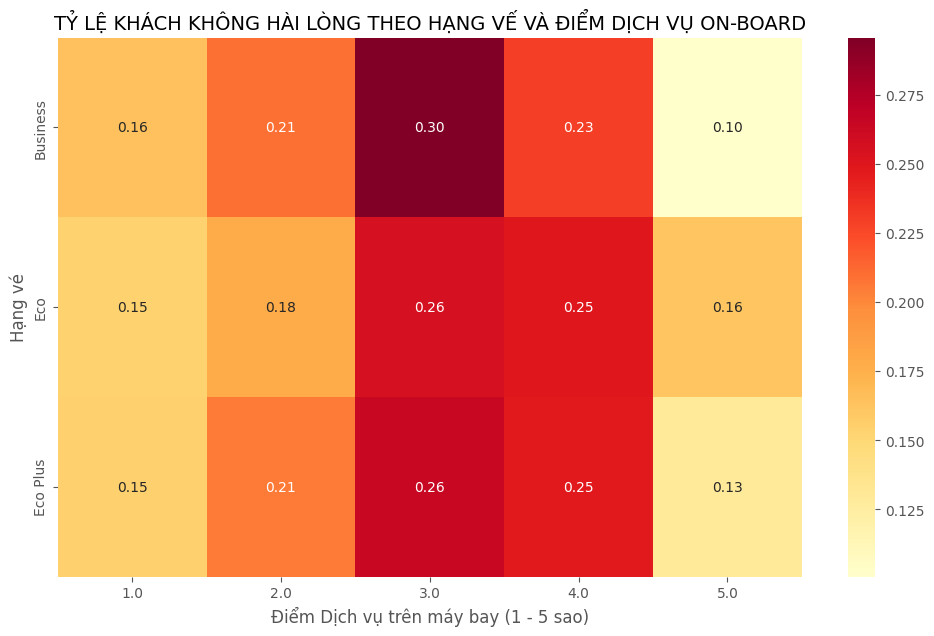

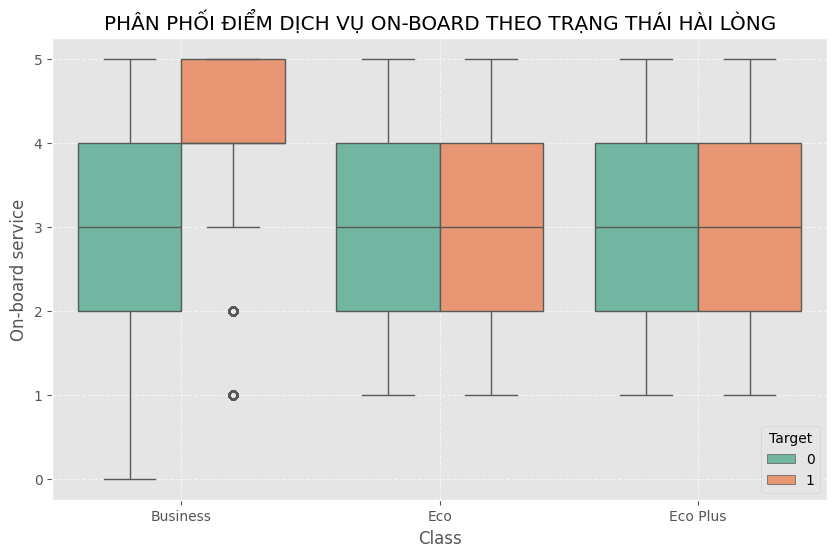

In [27]:
#EDA kết hợp giữa điểm dịch vụ trên máy bay (On-board service) và hạng vé để tìm ra chính xác những điểm khách hàng cảm thấy bị hớ nhất.
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))

# Tạo biểu đồ Heatmap để thấy mật độ khách hàng KHÔNG HÀI LÒNG 
# tại các mức điểm dịch vụ trên từng hạng ghế
# Bước này giúp tìm ra "Khoảng cách bị hớ" (Ví dụ: Hạng Business mà điểm dịch vụ chỉ 1-2)

# Lọc nhóm khách hàng không hài lòng
dissatisfied_train_final = train_final[train_final['Target'] == 0]

# Tạo bảng chéo (Cross-tab) giữa Hạng vé và Điểm dịch vụ
ctab = pd.crosstab(dissatisfied_train_final['Class'], dissatisfied_train_final['On-board service'], normalize='index')
ctab = ctab.drop(columns=0)  # Xóa cột 0 sao
# Vẽ Heatmap
sns.heatmap(ctab, annot=True, cmap='YlOrRd', fmt='.2f')

plt.title('TỶ LỆ KHÁCH KHÔNG HÀI LÒNG THEO HẠNG VẾ VÀ ĐIỂM DỊCH VỤ ON-BOARD', fontsize=14)
plt.xlabel('Điểm Dịch vụ trên máy bay (1 - 5 sao)')
plt.ylabel('Hạng vé')
plt.show()

# 3. Vẽ biểu đồ Boxplot để xem sự phân phối điểm dịch vụ
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='On-board service', hue='Target', data=train_final, palette='Set2')
plt.title('PHÂN PHỐI ĐIỂM DỊCH VỤ ON-BOARD THEO TRẠNG THÁI HÀI LÒNG')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Đánh giá heatmap:
- Hiện trạng:
    + Điểm nóng Business - 3 sao: Tỷ lệ khách hàng không hài lòng cao nhất nằm ở hạng Business nhưng chỉ nhận được 3 sao dịch vụ On-board (chiếm 0.30 - mức cao nhất toàn bảng).
    + Sự thất vọng ở mức điểm cao: Ngay cả khi dịch vụ đạt 4 sao, hạng Business vẫn có tỷ lệ không hài lòng (0.23) cao gần tương đương với hạng Eco (0.25).
    + Nhóm cá nhân (Personal Travel): Đây là nhóm chịu ảnh hưởng nặng nhất với tỷ lệ hài lòng tổng thể luôn dưới 15% dù mua bất kỳ hạng vé nào.
- Phân tích:
    + Chứng hớ dịch vụ: Khách mua vé Business kỳ vọng sự hoàn hảo. Việc 30% khách không hài lòng tập trung ở mức 3 sao cho thấy dịch vụ On-board tại khoang cao cấp đang chỉ dừng ở mức "phổ thông", khiến khách cảm thấy số tiền bỏ ra là vô nghĩa.
    + Tiêu chuẩn khắt khe: Khách Business không chấp nhận mức "trung bình". Trong khi khách Eco có thể tạm hài lòng với 3-4 sao, khách Business coi đó là một thất bại về dịch vụ.
    + Online Boarding là "mồi lửa": Nếu bước Online Boarding chỉ đạt 3 sao (vùng đỏ áp đảo), nó tạo tâm lý tiêu cực ngay từ đầu, khiến khách hàng khắt khe hơn với dịch vụ On-board sau đó.
- Kiến nghị:
    + Thiết lập "Sàn dịch vụ" Business: Tuyệt đối không để điểm On-board tại khoang Business rơi xuống mức 3 sao. Phải ưu tiên nguồn lực để đẩy 30% nhóm này lên mức 4-5 sao.
    + Gói trải nghiệm cho khách Personal: Thiết kế quy trình phục vụ riêng cho khách đi du lịch (Personal Travel) tại khoang Business để tận dụng cơ sở vật chất sẵn có nhưng tăng giá trị cảm xúc.
    + Hành động tức thì: Sử dụng dữ liệu real-time, nếu khách Business check-in online (Online Boarding) dưới 3 sao, tiếp viên trên máy bay phải được thông báo để chủ động chăm sóc bù đắp (Service Recovery).

Đánh giá boxplot:
1. Phân khúc Business (Hạng Thương gia) có sự khác biệt rõ rệt nhất:
- Đây là nhóm cho thấy mối liên quan mạnh mẽ nhất giữa chất lượng dịch vụ on-board và sự hài lòng chung:
- Nhóm hài lòng (Màu cam): Có mức điểm cực kỳ cao. Trung vị (median) đạt mức 5/5 tuyệt đối. Phần lớn hành khách hài lòng đều cho điểm từ 4 đến 5.
- Nhóm không hài lòng (Màu xanh): Điểm số phân tán rất rộng từ 0 đến 5, với trung vị chỉ ở mức 3.
```
Kết luận: Dịch vụ on-board là yếu tố "sống còn" ở hạng Business. Nếu điểm dịch vụ này thấp (dưới 4), khả năng khách hàng cảm thấy không hài lòng là rất cao.
```
2. Phân khúc Eco và Eco Plus (Hạng Phổ thông) có sự tương đồng lạ thường
- Sự chồng lấn: Cả nhóm hài lòng và không hài lòng đều có dải điểm (IQR) nằm trong khoảng từ 2 đến 4 điểm và trung vị đều ở mức 3 điểm.
```
Kết luận: Đối với khách hàng đi Eco và Eco Plus, điểm dịch vụ on-board không phải là yếu tố then chốt nhất để quyết định họ có hài lòng hay không. Một người cho 3 điểm vẫn có thể hài lòng (Target 1) và ngược lại. Có thể các yếu tố khác như giá vé hoặc đúng giờ quan trọng hơn với họ.
```
3. Các điểm bất thường (Outliers):
- Ở hạng Business, nhóm hài lòng (màu cam) vẫn có một số ít khách hàng cho điểm rất thấp (1 và 2 điểm) nhưng vẫn được xếp vào nhóm "Hài lòng" chung. Điều này cho thấy có thể các dịch vụ khác (như phòng chờ hoặc check-in ưu tiên) đã bù đắp lại sự thiếu sót của dịch vụ trên máy bay.

Tổng kết và Kiến nghị:
- Ưu tiên Business: Nên tập trung duy trì và nâng cao dịch vụ on-board cho khách Business vì đây là nhóm nhạy cảm nhất với dịch vụ này. Chỉ cần điểm giảm xuống mức 3, nguy cơ mất khách hàng trung thành là rất lớn.
- Xem xét lại Eco/Eco Plus: Vì điểm số dịch vụ ở hai hạng này không tạo ra sự khác biệt lớn giữa người hài lòng và không hài lòng, bạn nên kiểm tra thêm các dữ liệu khác (ví dụ: Độ trễ chuyến bay hoặc Sự thoải mái của ghế ngồi) để tìm ra nguyên nhân thực sự gây ra sự không hài lòng ở nhóm này.

------------------------------------------------------------------------------------------------------------------------------------------------------------

V. Xây dựng và Kiểm định mô hình (Machine Learning Pipeline)

Quy trình thực hiện:
1. Mã hóa (Encoding cột Categorical) và chuẩn hóa (Scaling cột numberical) pipeline.
2. Chia dữ liệu trên tập train_final (80% train,20% valid)
3. Xây mô hình trên 80% train bằng cross_validation_cv => Tìm ra mô hình có điểm tốt nhất (không chọn siêu tham số)
4. Tìm siêu tham số bằng mô hình có điểm tốt nhất bằng GridsearchCV => Cho học trên 20& valid.
5. Dự báo mô hình bằng tập test_final => Đánh giá kết quả.

Ở đây, vì cột mục tiêu là kiểm tra độ hài lòng của khách hàng nên sẽ sử dụng mô hình dạng phân loại, cụ thể:
- LogisticRegression: Đây là mô hình tuyến tính cơ bản giúp thiết lập ngưỡng hiệu suất tối thiểu (Baseline). Nếu dữ liệu có mối quan hệ đơn giản giữa các dịch vụ và sự hài lòng, mô hình này sẽ cho kết quả tốt ngay lập tức. Nó cũng giúp ta thấy được hệ số ảnh hưởng trực tiếp của từng biến.
- Decision Tree Classifier: Trực quan hơn, giúp mô phỏng chính xác hành trình quyết định của khách hàng và chỉ ra cụ thể 'ngưỡng điểm' nào của dịch vụ.
- Random Forest Classifier: Nâng cấp hơn Decision Tree vì nó đưa ra đa dạng kết quả dự báo hơn để nhìn thấy nhiều lỗ hổng theo thứ tự ảnh hưởng đến khách.
- XGBClassifier: Mô hình này nâng cấp hơn RFC (tương tự như một rừng dữ liệu). Nó đưa ra 1 cây thì sẽ thấy lỗ hổng của cây đó mà đi sâu vào lỗ hổng đó để thấy insight. Tập trung tối ưu hóa các trường hợp khách hàng 'khó dự đoán', giúp đẩy độ chính xác lên mức tối đa và tìm ra những quy luật ngầm phức tạp mà các mô hình khác bỏ sót.

In [28]:
train_final.head()

,Online boarding,Inflight entertainment,On-board service,Seat comfort,Inflight wifi service,Type of Travel,Class,Customer Type,Target
0,1.0,4.0,4.0,4.0,0.0,Business travel,Business,disloyal Customer,1
1,4.0,4.0,4.0,5.0,5.0,Business travel,Business,Loyal Customer,1
2,3.0,4.0,5.0,4.0,3.0,Personal Travel,Eco,Loyal Customer,0
3,4.0,5.0,5.0,4.0,2.0,Personal Travel,Eco,Loyal Customer,0
4,4.0,2.0,1.0,2.0,5.0,Business travel,Eco,disloyal Customer,1


In [29]:
train_final['Customer Type'].value_counts()

Customer Type
Loyal Customer       12235
disloyal Customer     2765
Name: count, dtype: int64

In [30]:
train_final['Type of Travel'].value_counts()

Type of Travel
Business travel    10307
Personal Travel     4693
Name: count, dtype: int64

In [31]:
train_final['Class'].value_counts()

Class
Business    7145
Eco         6754
Eco Plus    1101
Name: count, dtype: int64

In [32]:
# Copy dữ liệu để tránh thay đổi dữ liệu ban đầu
train_offical = train_final.copy()
test_offical = test_final.copy()

In [33]:
## 1. Mã hóa các biến Categorical bằng One-Hot Encoding
#from sklearn.preprocessing import OneHotEncoder
##Mã hóa cột Class bằng Mapping vì có thứ tự rõ ràng ở tập train và test
#class_mapping = {'Eco': 1, 'Eco Plus': 2, 'Business': 3}
#train_offical['Class'] = train_offical['Class'].map(class_mapping)
#test_offical['Class'] = test_offical['Class'].map(class_mapping)
##Tạo hàm One-Hot Encoding cho cả train và test ở cột Type of Travel, Customer Type
#def one_hot_encode(train_df, test_df, categorical_cols):
#    encoder = OneHotEncoder(sparse_output=False) # Khởi tạo OneHotEncoder
#    # Fit và transform trên tập train
#    train_encoded = encoder.fit_transform(train_df[categorical_cols])
#    test_encoded = encoder.transform(test_df[categorical_cols])
#    
#    # Lấy tên cột mới sau khi mã hóa
#    encoded_cols = encoder.get_feature_names_out(categorical_cols)
#    
#    # Chuyển đổi mảng numpy thành DataFrame
#    train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_cols, index=train_df.index)
#    test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_cols, index=test_df.index)
#    
#    # Loại bỏ các cột gốc và thêm các cột đã mã hóa
#    train_df = train_df.join(train_encoded_df).drop(columns=categorical_cols)
#    test_df = test_df.join(test_encoded_df).drop(columns=categorical_cols)
#    
#    return train_df, test_df
##Tạo danh sách các cột Categorical để mã hóa
#categorical_cols = ['Type of Travel', 'Customer Type']
##Áp dụng One-Hot Encoding
#train_offical, test_offical = one_hot_encode(train_offical, test_offical, categorical_cols)  # Chỉ mã hóa các biến Categorical

In [34]:
#Tuy nhiên việc sử dụng one hot encoding cho các cột chỉ có 2 giá trị như Type of Travel, Customer Type sẽ làm tăng số chiều dữ liệu lên rất nhiều. Do đó ta sử dụng mapping để giữ nguyên thông tin này.
# Mã hóa cột Class bằng Mapping vì có thứ tự rõ ràng ở tập train và test
class_mapping = {'Eco': 1, 'Eco Plus': 2, 'Business': 3}
train_offical['Class'] = train_offical['Class'].map(class_mapping)
test_offical['Class'] = test_offical['Class'].map(class_mapping)
# Mã hóa cột Type of Travel bằng Mapping
type_of_travel_mapping = {'Personal Travel': 0, 'Business travel': 1}
train_offical['Type of Travel'] = train_offical['Type of Travel'].map(type_of_travel_mapping)
test_offical['Type of Travel'] = test_offical['Type of Travel'].map(type_of_travel_mapping)
# Mã hóa cột Customer Type bằng Mapping
customer_type_mapping = {'Loyal Customer': 1, 'disloyal Customer': 0}    
train_offical['Customer Type'] = train_offical['Customer Type'].map(customer_type_mapping)
test_offical['Customer Type'] = test_offical['Customer Type'].map(customer_type_mapping)    

In [35]:
## Xuất tập train_offical và test_offical đã mã hóa ra file csv
train_offical.to_csv('D:/DATA1/Study/DA/APM02/FinalProject_HoaPhuoc_APM02/Dataset/train_offical1.csv', index=False)
test_offical.to_csv('D:/DATA1/Study/DA/APM02/FinalProject_HoaPhuoc_APM02/Dataset/test_offical1.csv', index=False)

In [36]:
train_offical.head()

,Online boarding,Inflight entertainment,On-board service,Seat comfort,Inflight wifi service,Type of Travel,Class,Customer Type,Target
0,1.0,4.0,4.0,4.0,0.0,1,3,0,1
1,4.0,4.0,4.0,5.0,5.0,1,3,1,1
2,3.0,4.0,5.0,4.0,3.0,0,1,1,0
3,4.0,5.0,5.0,4.0,2.0,0,1,1,0
4,4.0,2.0,1.0,2.0,5.0,1,1,0,1


In [37]:
# 2. Chia dữ liệu trên tập train_offical thành X và y
#Ép kiểu cho các cột Categorical ở tập train_offical và test_offical thành int để chạy mô hình XGboost
cols = ['Type of Travel', 'Customer Type', 'Class']
for col in cols:
    train_offical[col] = train_offical[col].astype('int')
    test_offical[col] = test_offical[col].astype('int')
#Bắt đầu chia dữ liệu
X = train_offical.drop(columns=['Target'], axis=1)
y = train_offical['Target']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm định:", X_valid.shape)

Kích thước tập huấn luyện: (12000, 8)
Kích thước tập kiểm định: (3000, 8)


In [38]:
# 3. Xây dựng mô hình bằng cross-validation-cv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore') # Chặn mọi cảnh báo rác 
#Tạo dictionary lưu các mô hình
models = {
    'Logistic':LogisticRegression(),
    'RFC':RandomForestClassifier(),
    'DTC':DecisionTreeClassifier(),
    'XGB':XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)     #use_label_encoder=False để tránh cảnh báo vì đã mã hóa sẵn, eval_metric='logloss' để đánh giá mô hình phân loại nhị phân
}
#Tạp vòng lặp để huấn luyện và đánh giá từng mô hình bằng cross-validation trên 80% dữ liệu train_offical
print("Kết quả Cross-Validation trên tập huấn luyện:")
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  #5-fold cross-validation
    results[name] = cv_scores
    print(f"{name}: Mean Accuracy = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}")

Kết quả Cross-Validation trên tập huấn luyện:
Logistic: Mean Accuracy = 0.8622, Std = 0.0061
RFC: Mean Accuracy = 0.9342, Std = 0.0032
DTC: Mean Accuracy = 0.9308, Std = 0.0025
XGB: Mean Accuracy = 0.9382, Std = 0.0011


Đánh giá mô hình (không chứa siêu tham số):
1. Độ chính xác cao nhất (Mean Accuracy): XGBoost dẫn đầu, bám sát là Random Forest (93.47%) và Decision Tree (93.03%). Điều này chứng tỏ dòng họ nhà "Cây" rất hợp với dữ liệu này.
2. Độ ổn định (Std = 0.0011): Đây là điểm cộng lớn nhất của XGBoost. Độ lệch chuẩn (Std) cực thấp cho thấy mô hình này rất vững chãi, không bị "hên xui" khi đổi tập dữ liệu khác nhau.
3. Vượt xa Baseline (Logistic 86.22%): Khoảng cách gần 8% giữa Logistic và các mô hình còn lại cho thấy dữ liệu có những mối quan hệ phức tạp mà một đường thẳng (tuyến tính) không thể diễn tả hết được.

Siêu tham số đặc trưng của mô hình XGBoost Classifier:
- Cặp learning_rate (Vận tốc học) và n_estimators (Số lượng cây): Đây là tham số định nghĩa bản chất của thuật toán Gradient Boosting. Boosting không học tất cả cùng lúc mà học tịnh tiến (sequential learning). Mỗi cây mới được tạo ra để sửa lỗi cho các cây phía trước.
- max_depth (Độ sâu tối đa của cây): Quyết định khả năng mô hình hóa các mối quan hệ phức tạp.
- Cặp subsample (Tỷ lệ mẫu dữ liệu) và min_child_weight (Trọng số nút lá): Đây là các tham số kiểm soát tính bền vững. Ngăn mô hình "học thuộc lòng" dữ liệu Train. 
+ subsample: Giúp mô hình tiếp xúc với những góc nhìn khác nhau của dữ liệu.
+ min_child_weight: Buộc mô hình phải có đủ bằng chứng (số lượng khách hàng đủ lớn) thì mới được tạo ra một quy luật mới.


In [39]:
# 3. Tìm siêu tham số tốt nhất cho mô hình XGBoost bằng Grid Search CV
warnings.filterwarnings('ignore') # Chặn mọi cảnh báo rác 
#Định nghĩa lưới siêu tham số
param_grid = {
    #Số lượng cây: Thử từ 100 đến 500.
    'n_estimators': [100, 300, 500, 1000],
    #Độ sâu của cây: Dữ liệu ít cột nên để thấp (3-6) để tránh học vẹt.
    'max_depth': [3, 5, 7, 9, 11, 13],
    #Tốc độ học: 0.1 là chuẩn, 0.01 để học kỹ hơn nhưng cần nhiều cây hơn
    'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.2],
    #Kiểm soát Overfitting: Rất quan trọng với dữ liệu ít biến.
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    #Điều kiện dừng nhánh: Giúp mô hình bớt "nhạy cảm" với nhiễu.
    'min_child_weight': [1, 5]
}
#Khởi tạo mô hình XGBClassifier
XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
#Khởi tạo GridSearchCV
super_model = GridSearchCV(estimator=XGB_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
# Huấn luyện
super_model.fit(X_train, y_train)

# In kết quả
print("Bộ tham số tốt nhất cho hãng bay:", super_model.best_params_)
print("Accuracy cao nhất đạt được:", super_model.best_score_)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Bộ tham số tốt nhất cho hãng bay: {'colsample_bytree': 0.8, 'learning_rate': 0.08, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1.0}
Accuracy cao nhất đạt được: 0.9423333333333334


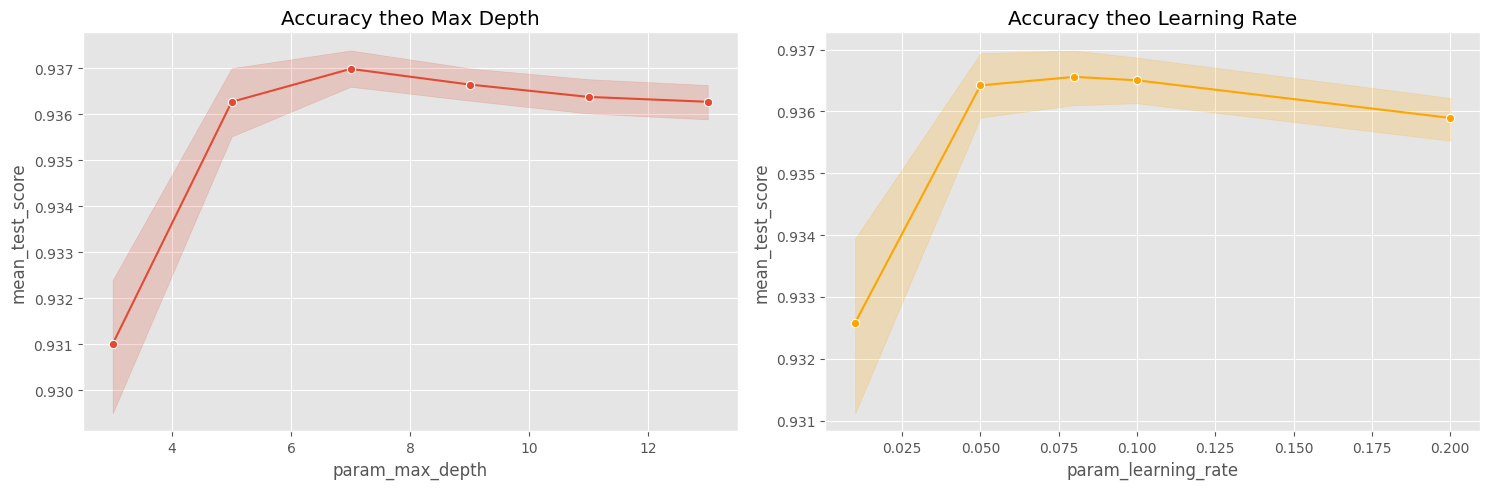

param_max_depth
3     0.931008
5     0.936268
7     0.936984
9     0.936644
11    0.936375
13    0.936269
Name: mean_test_score, dtype: float64
param_learning_rate
0.01    0.932584
0.05    0.936420
0.08    0.936557
0.10    0.936502
0.20    0.935894
Name: mean_test_score, dtype: float64


In [40]:
# Chuyển kết quả grid search thành DataFrame
results_df = pd.DataFrame(super_model.cv_results_)

# Vẽ sự thay đổi Accuracy theo từng tham số cụ thể
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Theo Max Depth
sns.lineplot(data=results_df, x='param_max_depth', y='mean_test_score', ax=axes[0], marker='o')
axes[0].set_title('Accuracy theo Max Depth')

# Theo Learning Rate
sns.lineplot(data=results_df, x='param_learning_rate', y='mean_test_score', ax=axes[1], marker='o', color='orange')
axes[1].set_title('Accuracy theo Learning Rate')

plt.tight_layout()
plt.show()
# Lọc kết quả để xem riêng Max Depth
depth_results = results_df.groupby('param_max_depth')['mean_test_score'].mean()
learn_rate_results = results_df.groupby('param_learning_rate')['mean_test_score'].mean()
print(depth_results)
print(learn_rate_results)

=> Chọn depth 7 vì đây là ngưỡng vừa đủ để mô hình hiểu được các mối liên hệ giữa các dịch vụ hàng không mà không khiến cây quá cồng kềnh, giúp giảm thiểu rủi ro Overfitting ngay từ cấu trúc.

=> Có thể chọn max_depth=7 và learning rate = 0.08

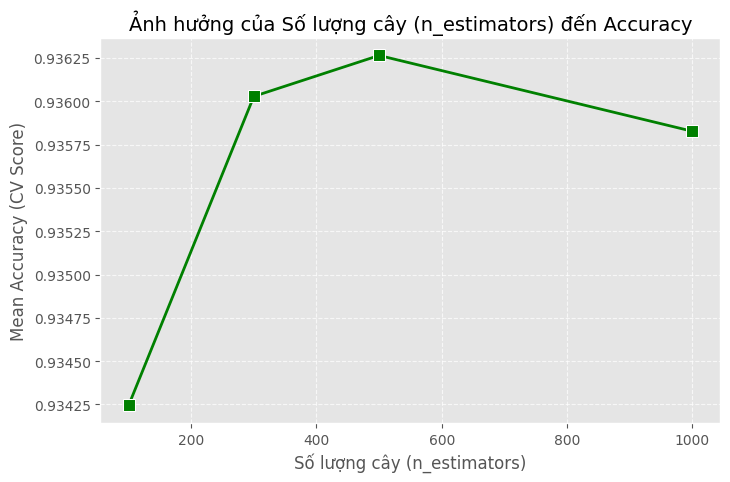

Accuracy trung bình theo số lượng cây:
param_n_estimators
100     0.934244
300     0.936029
500     0.936265
1000    0.935827
Name: mean_test_score, dtype: float64


In [41]:
# 1. Tính Accuracy trung bình cho từng mức n_estimators
estimators_results = results_df.groupby('param_n_estimators')['mean_test_score'].mean()

# 2. Vẽ biểu đồ
plt.figure(figsize=(8, 5))
sns.lineplot(x=estimators_results.index, y=estimators_results.values, marker='s', markersize=8, color='green', linewidth=2)

plt.title('Ảnh hưởng của Số lượng cây (n_estimators) đến Accuracy', fontsize=14)
plt.xlabel('Số lượng cây (n_estimators)', fontsize=12)
plt.ylabel('Mean Accuracy (CV Score)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# In con số cụ thể để ní dễ so sánh
print("Accuracy trung bình theo số lượng cây:")
print(estimators_results)

Đồ thị thể hiện mối quan hệ giữa số lượng cây trong mô hình (có thể là Random Forest hoặc XGBoost) và độ chính xác (Mean Accuracy):
- Giai đoạn tăng trưởng mạnh (100 - 500 cây): Khi bạn tăng số lượng cây từ 100 lên 500, độ chính xác tăng vọt từ khoảng 0.9342 lên sát mức 0.9363. Đây là giai đoạn mô hình "học" được nhiều đặc trưng quan trọng từ dữ liệu.
- Giai đoạn bão hòa (500 - 1000 cây): Từ 500 cây trở đi, đường biểu diễn bắt đầu đổ dốc đi xuống. Giảm từ 0.9363 xuống khoảng 0.9358.

=> Chọn n_estimator = 500

=> Dùng Learning Rate thấp 0.08 kết hợp với 500 cây để đảm bảo mô hình học kỹ lưỡng từng sai số nhỏ, giúp kết quả cuối cùng đạt độ chính xác cao và ổn định.

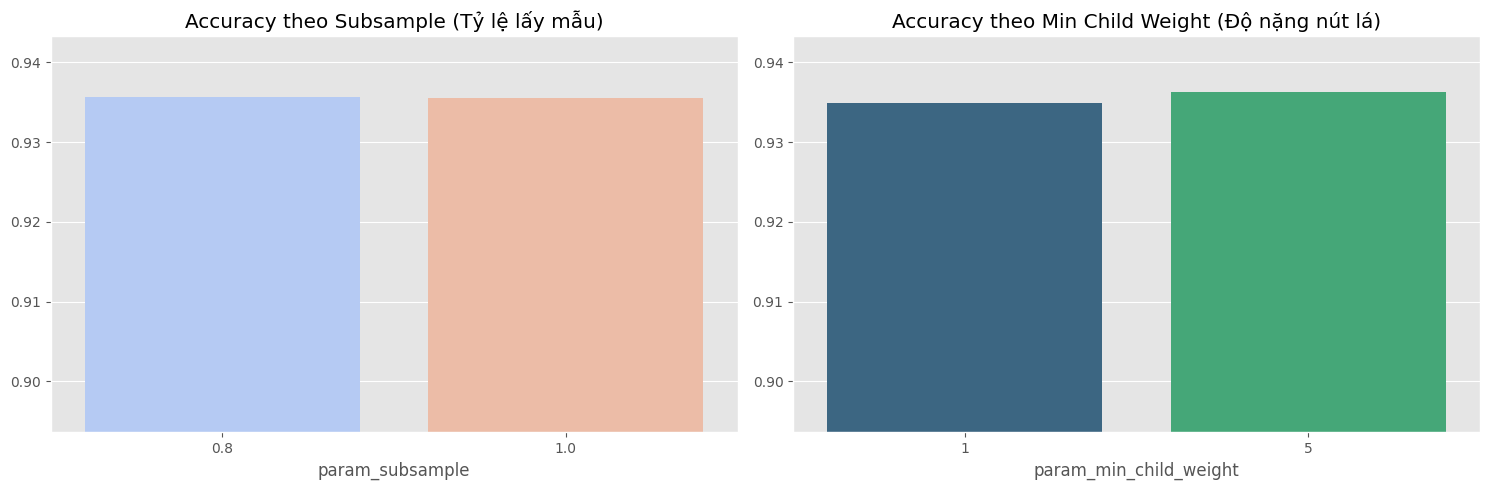

Chi tiết Subsample:
 param_subsample
0.8    0.935642
1.0    0.935540
Name: mean_test_score, dtype: float64

Chi tiết Min Child Weight:
 param_min_child_weight
1    0.934916
5    0.936266
Name: mean_test_score, dtype: float64


In [42]:
# 1. Tính Accuracy trung bình theo Subsample và Min Child Weight
subsample_res = results_df.groupby('param_subsample')['mean_test_score'].mean()
child_weight_res = results_df.groupby('param_min_child_weight')['mean_test_score'].mean()

# 2. Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Biểu đồ Subsample
sns.barplot(x=subsample_res.index, y=subsample_res.values, ax=axes[0], palette='coolwarm')
axes[0].set_title('Accuracy theo Subsample (Tỷ lệ lấy mẫu)')
axes[0].set_ylim(results_df['mean_test_score'].min() - 0.001, results_df['mean_test_score'].max() + 0.001)

# Biểu đồ Min Child Weight
sns.barplot(x=child_weight_res.index, y=child_weight_res.values, ax=axes[1], palette='viridis')
axes[1].set_title('Accuracy theo Min Child Weight (Độ nặng nút lá)')
axes[1].set_ylim(results_df['mean_test_score'].min() - 0.001, results_df['mean_test_score'].max() + 0.001)

plt.tight_layout()
plt.show()

print("Chi tiết Subsample:\n", subsample_res)
print("\nChi tiết Min Child Weight:\n", child_weight_res)

=> Chọn Subsample 0.8 và Min Child Weight 5 để ép mô hình phải học những quy luật mang tính đại diện cho đám đông, thay vì bám đuổi theo những trường hợp khách hàng cá biệt (nhiễu).

=> Chọn Subsample = 0.8 và min_child_weight = 5

In [43]:
import plotly.express as px
import nbformat

# Chọn các cột cần xem
cols_to_plot = ['param_learning_rate', 'param_n_estimators', 'param_max_depth', 
                'param_subsample', 'param_min_child_weight', 'mean_test_score']

fig = px.parallel_coordinates(results_df[cols_to_plot], 
                              color="mean_test_score",
                              title="Toàn cảnh sự kết hợp siêu tham số")
fig.show()

In [44]:
# 4. Dánh giá mô hình XGBoost với siêu tham số tốt nhất trên tập kiểm định
# Lấy mô hình tốt nhất từ GridSearchCV
# Lọc ra bộ tham số thỏa mãn các tiêu chí "Bền vững" mà vẫn đạt điểm cao
best7 = results_df[
    (results_df['param_max_depth'] == 7) &
    (results_df['param_learning_rate'] == 0.08) &
    (results_df['param_n_estimators'] == 500) &
    (results_df['param_min_child_weight'] == 5) &
    (results_df['param_subsample'] == 0.8)
].sort_values(by='mean_test_score', ascending=False).iloc[0]['params']

print("Bộ tham số tốt nhất:")
print(best7)
best_xgb_model7 = XGBClassifier(**best7, use_label_encoder=False, eval_metric='logloss', random_state=42) #dấu ** để giải nén dictionary thành tham số
# Huấn luyện mô hình với bộ tham số tốt nhất trên toàn bộ tập huấn luyện
best_xgb_model7.fit(X_train, y_train)
# Đánh giá mô hình tốt nhất trên tập kiểm định
y_pred7 = best_xgb_model7.predict(X_valid)
print("Đánh giá mô hình XGBoost với siêu tham số tốt nhất:")
print(classification_report(y_valid, y_pred7))

Bộ tham số tốt nhất:
{'colsample_bytree': 0.8, 'learning_rate': 0.08, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.8}
Đánh giá mô hình XGBoost với siêu tham số tốt nhất:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1700
           1       0.94      0.92      0.93      1300

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



In [45]:
# 4. Dánh giá mô hình XGBoost với siêu tham số tốt nhất trên tập kiểm định
# Lấy mô hình tốt nhất từ GridSearchCV
# Lọc ra bộ tham số thỏa mãn các tiêu chí "Bền vững" mà vẫn đạt điểm cao
best9 = results_df[
    (results_df['param_max_depth'] == 9) &
    (results_df['param_learning_rate'] == 0.08) & 
    (results_df['param_n_estimators'] == 500) &
    (results_df['param_min_child_weight'] == 5) &
    (results_df['param_subsample'] == 0.8)
].sort_values(by='mean_test_score', ascending=False).iloc[0]['params']

print("Bộ tham số tốt nhất:")
print(best9)
best_xgb_model9 = XGBClassifier(**best9, use_label_encoder=False, eval_metric='logloss', random_state=42) #dấu ** để giải nén dictionary thành tham số
# Huấn luyện mô hình với bộ tham số tốt nhất trên toàn bộ tập huấn luyện
best_xgb_model9.fit(X_train, y_train)
# Đánh giá mô hình tốt nhất trên tập kiểm định
y_pred9 = best_xgb_model9.predict(X_valid)
print("Đánh giá mô hình XGBoost với siêu tham số tốt nhất:")
print(classification_report(y_valid, y_pred9))

Bộ tham số tốt nhất:
{'colsample_bytree': 0.8, 'learning_rate': 0.08, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.8}
Đánh giá mô hình XGBoost với siêu tham số tốt nhất:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1700
           1       0.94      0.92      0.93      1300

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



In [46]:
from sklearn.metrics import roc_auc_score, log_loss
# AUC càng tiệm cận 1 càng tốt, Log Loss càng tiệm cận 0 càng tốt
y_proba7 = best_xgb_model7.predict_proba(X_valid)[:, 1]
print(f"AUC Score7: {roc_auc_score(y_valid, y_proba7):.6f}")
print(f"Log Loss7: {log_loss(y_valid, y_proba7):.6f}")
y_proba9 = best_xgb_model9.predict_proba(X_valid)[:, 1]
print(f"AUC Score9: {roc_auc_score(y_valid, y_proba9):.6f}")
print(f"Log Loss9: {log_loss(y_valid, y_proba9):.6f}")

AUC Score7: 0.984609
Log Loss7: 0.151890
AUC Score9: 0.984665
Log Loss9: 0.151218


=> Mặc dù nhìn sơ qua cả hai đều đạt có kết quả trong bảng classification như nhau, nhưng nên chọn Max Depth = 7 vì những lý do sau:

- Nguyên lý Occam's Razor: Trong khoa học dữ liệu, nếu hai mô hình cho kết quả như nhau, mô hình nào đơn giản hơn thì mô hình đó tốt hơn.
- Chống Overfitting: Độ sâu 7 ít rủi ro "học vẹt" hơn độ sâu 9. Vì với min_child_weight=5, mô hình đã tự động dừng lại ở ngưỡng tối ưu để tránh chia nhỏ dữ liệu quá mức gây nhiễu.
- Tốc độ: Mô hình nông hơn sẽ chạy nhanh hơn và tốn ít bộ nhớ hơn khi triển khai thực tế.
- Cấu trúc dữ liệu của bài toán này đã được giải quyết triệt để ở độ sâu 7. Vì vậy, nhóm quyết định chọn Max Depth = 7 để tối ưu hóa tốc độ xử lý và đảm bảo tính tổng quát hóa (Generalization) cao nhất cho mô hình.

Đánh giá kết quả bộ thông số best7 như sau:
1. Độ chính xác tổng thể (Accuracy: 0.94):
```
Con số 94% cho thấy cứ 100 khách hàng, mô hình dự đoán đúng trạng thái hài lòng của 94 người. Đây là một con số cực kỳ ấn tượng trong ngành dịch vụ hàng không, nơi dữ liệu thường có nhiều yếu tố nhiễu.
```
2. Khả năng nhận diện khách hàng "Không hài lòng" (Lớp 0):
```
- Precision (0.94): Khi mô hình nói trong 100% khách hàng "Không hài lòng", thì 94% trường hợp là bắt đúng. Chỉ có 6% bị đoán nhầm.
- Recall (0.96): Mô hình tìm ra được 96% tổng số khách hàng đang khó chịu. Điều này cực kỳ quan trọng vì hãng bay cần biết ai không hài lòng để chăm sóc và cải thiện dịch vụ kịp thời.
```
3. Khả năng nhận diện khách hàng "Hài lòng" (Lớp 1):
```
- Recall (0.92): Mô hình nhận diện được 92% khách hàng vui vẻ. Mặc dù thấp hơn một chút so với lớp 0, nhưng con số này vẫn rất cao và ổn định.
- F1-Score (0.93): Sự cân bằng giữa Precision và Recall ở mức 0.93 cho thấy mô hình không bị thiên lệch (bias) về bất kỳ nhóm nào.
```

------------------------------------------------------------------------------------------------------------------------------------------------------------

VI. Kết luận và kiến nghị chiến lược:

1. Lựa chọn mô hình tối ưu:
- Dựa trên quá trình thử nghiệm và tinh chỉnh, mô hình XGBoost Classifier với bộ tham số đã được lựa chọn: 
```
{'colsample_bytree': 0.8, 'learning_rate': 0.08, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.8}
```

Đánh giá kết quả mô hình khi kiểm tra trên toàn bộ tập train_official:

1. Độ chính xác tổng thể (Accuracy: 0.94):
```
Con số 94% cho thấy cứ 100 khách hàng, mô hình dự đoán đúng trạng thái hài lòng của 94 người. Đây là một con số cực kỳ ấn tượng trong ngành dịch vụ hàng không, nơi dữ liệu thường có nhiều yếu tố nhiễu.
```
2. Khả năng nhận diện khách hàng "Không hài lòng" (Lớp 0):
```
- Precision (0.94): Khi mô hình nói trong 100% khách hàng "Không hài lòng", thì 94% trường hợp là bắt đúng. Chỉ có 6% bị đoán nhầm.
- Recall (0.96): Mô hình tìm ra được 96% tổng số khách hàng đang khó chịu. Điều này cực kỳ quan trọng vì hãng bay cần biết ai không hài lòng để chăm sóc và cải thiện dịch vụ kịp thời.
```
3. Khả năng nhận diện khách hàng "Hài lòng" (Lớp 1):
```
- Recall (0.92): Mô hình nhận diện được 92% khách hàng vui vẻ. Mặc dù thấp hơn một chút so với lớp 0, nhưng con số này vẫn rất cao và ổn định.
- F1-Score (0.93): Sự cân bằng giữa Precision và Recall ở mức 0.93 cho thấy mô hình không bị thiên lệch (bias) về bất kỳ nhóm nào.
```

In [47]:
#Dự báo trên tập test_offical với mô hình tốt nhất
# Sử dụng mô hình 'Hoa hậu' đã train để dự báo tập thi thật
X_test = test_offical.drop(columns=['Target'], axis=1)
y_test = test_offical['Target']
y_pred_final = best_xgb_model7.predict(X_test)

print("KẾT QUẢ CUỐI CÙNG TRÊN TẬP TEST_OFFICIAL:")
print(classification_report(y_test, y_pred_final))

KẾT QUẢ CUỐI CÙNG TRÊN TẬP TEST_OFFICIAL:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14573
           1       0.94      0.93      0.93     11403

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



Đánh giá kết quả:
1. Đánh giá "Điểm thi thật" (Tập Test Official):
- Sự ổn định tuyệt đối: Accuracy đạt 94%, tương đương với kết quả trên tập Validation (cũng 94%). Điều này chứng tỏ mô hình cực kỳ bền vững (Robust).
- Khả năng "bắt bệnh" khách hàng Lớp 0: Recall đạt 0.95, nghĩa là mô hình tìm ra được 95% khách hàng không hài lòng trong thực tế. Đây là chỉ số quan trọng nhất để doanh nghiệp kịp thời cứu vãn trải nghiệm khách hàng.
- Cân bằng hoàn hảo: Các chỉ số Precision và Recall cho cả hai nhóm (0 và 1) đều dao động quanh mức 0.93 - 0.95, cho thấy mô hình dự báo rất công tâm, không bị lệch về phía nào.

2. Kiến nghị hành động:


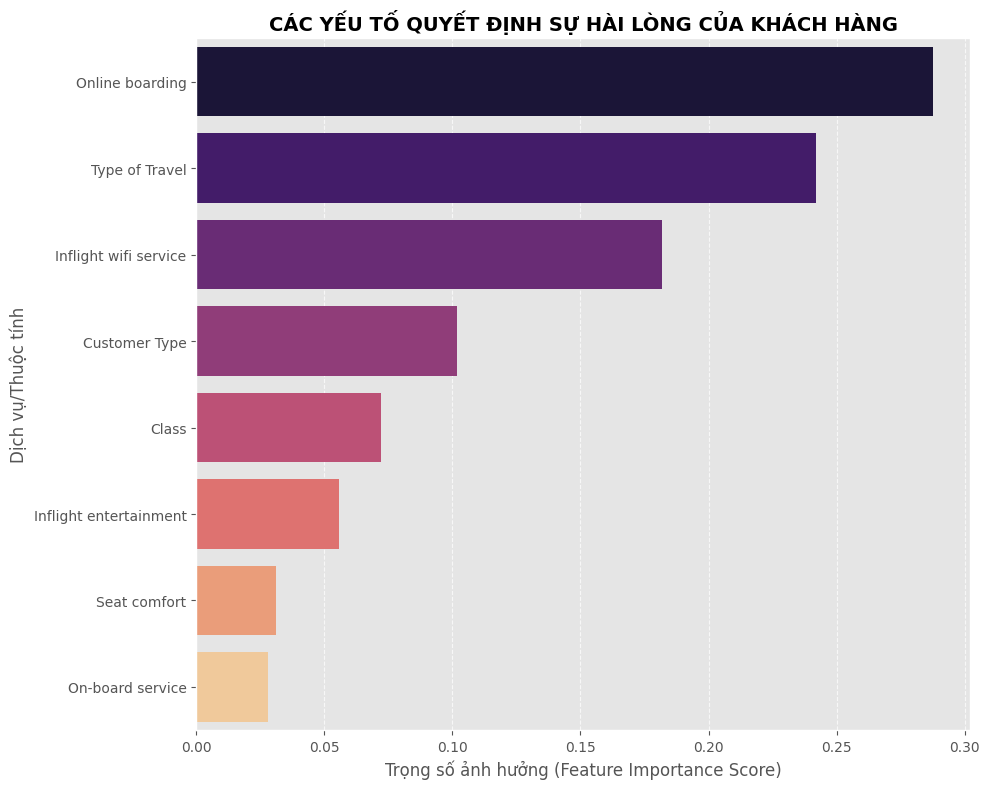

Top 5 yếu tố quan trọng nhất mà hãng bay cần chú ý:
                 Dịch vụ  Mức độ ảnh hưởng
0        Online boarding          0.287782
5         Type of Travel          0.241825
4  Inflight wifi service          0.181836
7          Customer Type          0.101811
6                  Class          0.071945


In [48]:
# 1. Sử dụng thuộc tính Feature Importance/Permutation Importance từ mô hình XGBoost để đánh giá tầm quan trọng của các đặc trưng
importances = best_xgb_model7.feature_importances_
feature_names = X_test.columns # Dùng tên cột từ X_test ní vừa tách

# 2. Tạo DataFrame để dễ sắp xếp và vẽ đồ thị
feature_importance_df = pd.DataFrame({
    'Dịch vụ': feature_names,
    'Mức độ ảnh hưởng': importances
}).sort_values(by='Mức độ ảnh hưởng', ascending=False)

# 3. Vẽ biểu đồ Top các yếu tố quan trọng nhất
plt.figure(figsize=(10, 8))
sns.barplot(x='Mức độ ảnh hưởng', y='Dịch vụ', data=feature_importance_df, palette='magma')

plt.title('CÁC YẾU TỐ QUYẾT ĐỊNH SỰ HÀI LÒNG CỦA KHÁCH HÀNG', fontsize=14, fontweight='bold')
plt.xlabel('Trọng số ảnh hưởng (Feature Importance Score)')
plt.ylabel('Dịch vụ/Thuộc tính')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. In ra Top 5 để ní dễ nhìn mà viết kiến nghị
print("Top 5 yếu tố quan trọng nhất mà hãng bay cần chú ý:")
print(feature_importance_df.head(5))

KIẾN NGHỊ HÀNH ĐỘNG:
1. Online Boarding (Trọng số cao nhất: 0.287) – "Số hóa là sống còn"
- Đây là yếu tố quan trọng nhất. Khách hàng ngày nay cực kỳ dị ứng với việc phải xếp hàng dài tại sân bay.
- Insight: Trải nghiệm số trước chuyến bay quyết định tâm trạng của cả hành trình.
- Hành động: 
    + Tối ưu hóa ứng dụng di động để thủ tục check-in chỉ mất dưới 30 giây.
    + Tăng cường gửi thông báo nhắc làm thủ tục online qua Zalo/SMS để giảm tải cho quầy thủ tục truyền thống.

2. Type of Travel (Trọng số: 0.250) – "Phân khúc khách hàng mục tiêu"
- Mô hình cho thấy khách đi Công tác (Business Travel) có những kỳ vọng và phản ứng rất khác biệt so với khách đi chơi.
- Insight: Nhóm khách hàng Business mang lại lợi nhuận cao nhưng cực kỳ khắt khe về thời gian và sự tiện lợi.
- Hành động: 
    + Xây dựng các đặc quyền riêng cho nhóm khách đi công tác (như lối đi ưu tiên, quầy thủ tục nhanh).
    + Thiết kế các gói combo dịch vụ tập trung vào sự yên tĩnh và kết nối công việc liên tục.

3. Inflight Wifi Service (Trọng số: 0.178) – "Kết nối là nhu cầu cơ bản"
- Wifi không còn là dịch vụ "sang chảnh" mà đã trở thành tiêu chuẩn đánh giá chất lượng.
- Insight: Một chuyến bay dù ghế êm nhưng không có internet sẽ khiến khách hàng hiện đại cảm thấy bị "cô lập".
- Hành động: 
    + Đầu tư nâng cấp băng thông vệ tinh trên máy bay.
    + Nên cung cấp gói Wifi miễn phí cơ bản (chỉ nhắn tin) cho tất cả khách hàng và bán các gói tốc độ cao để tăng doanh thu phụ trợ.

Đề xuất kịch bản chăm sóc khách hàng:
Dựa trên sức mạnh dự báo 94% của mô hình, Đề xuất hãng bay triển khai hệ thống "Cảnh báo trải nghiệm tệ":
- Hệ thống nhận diện: Khi khách hàng check-in hoặc đặt vé, mô hình sẽ tính toán xác suất hài lòng.
- Hành động ngay lập tức: Nếu mô hình dự báo khách hàng này có nguy cơ "Không hài lòng" (Xác suất > 70%), nhân viên tại sân bay hoặc tiếp viên sẽ nhận được thông báo để chủ động hỏi thăm, tặng thêm dịch vụ (ví dụ: một món uống miễn phí) để xoay chuyển tâm lý khách hàng ngay tại chỗ.

In [49]:
import joblib

# Thay bằng biến mô hình bạn đã train: best_xgb_model7
model_obj = {
    'model': best_xgb_model7,
    'features': [
        'Online boarding','Inflight entertainment','On-board service',
        'Seat comfort','Inflight wifi service','Type of Travel','Class','Customer Type'
    ],
    'mappings': {
        'Type of Travel': {'Personal Travel': 0, 'Business travel': 1},
        'Class': {'Eco': 1, 'Eco Plus': 2, 'Business': 3},
        'Customer Type': {'Loyal Customer': 1, 'disloyal Customer': 0}
    }
}

joblib.dump(model_obj, 'best_xgb_model7.joblib')
print("Saved -> best_xgb_model7.joblib")

Saved -> best_xgb_model7.joblib


In [50]:
import gradio as gr

obj = joblib.load('best_xgb_model7.joblib')
model = obj['model']
maps = obj['mappings']

def predict_fn(online, entertainment, onboard, seat, wifi, type_travel, cls, cust_type):
    # map categorical inputs
    tt = maps['Type of Travel'][type_travel]
    cl = maps['Class'][cls]
    ct = maps['Customer Type'][cust_type]
    X = np.array([[online, entertainment, onboard, seat, wifi, tt, cl, ct]], dtype=float)
    proba = model.predict_proba(X)[0,1]
    label = "Hài lòng" if proba >= 0.5 else "Không hài lòng"
    return label, float(proba)

inputs = [
    gr.Slider(1,5, step=1, label="Online boarding"),
    gr.Slider(1,5, step=1, label="Inflight entertainment"),
    gr.Slider(1,5, step=1, label="On-board service"),
    gr.Slider(1,5, step=1, label="Seat comfort"),
    gr.Slider(1,5, step=1, label="Inflight wifi service"),
    gr.Dropdown(['Personal Travel','Business travel'], label="Type of Travel"),
    gr.Dropdown(['Eco','Eco Plus','Business'], label="Class"),
    gr.Dropdown(['Loyal Customer','disloyal Customer'], label="Customer Type")
]

outputs = [gr.Label(label="Dự đoán"), gr.Number(label="Xác suất hài lòng")]

gr.Interface(fn=predict_fn, inputs=inputs, outputs=outputs,
             title="Dự đoán mức độ hài lòng hành khách",
             description="Nhập điểm dịch vụ và thông tin vé để dự đoán").launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [51]:
obj = joblib.load('best_xgb_model7.joblib')
model = obj['model']
features = obj['features']
maps = obj['mappings']

def predict_batch(df: pd.DataFrame) -> pd.DataFrame:
    df2 = df.copy()
    # Map categorical; nếu giá trị lạ thì gán np.nan hoặc xử lý lỗi
    df2['Type of Travel'] = df2['Type of Travel'].map(maps['Type of Travel'])
    df2['Class'] = df2['Class'].map(maps['Class'])
    df2['Customer Type'] = df2['Customer Type'].map(maps['Customer Type'])
    # Sắp cột đúng thứ tự feature
    X = df2[features].astype(float).values
    proba = model.predict_proba(X)[:, 1]
    df_out = df.copy()
    df_out['prob_hai_long'] = proba
    df_out['pred'] = np.where(proba >= 0.5, 'Hài lòng', 'Không hài lòng')
    return df_out

In [52]:
import gradio as gr

def predict_csv(file):
    df = pd.read_csv(file.name)
    return predict_batch(df)

iface = gr.Interface(fn=predict_csv,
                     inputs=gr.File(label="Upload CSV (columns must match)"),
                     outputs=gr.Dataframe(label="Kết quả (có proba và pred)"))
iface.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
